# BANK LOAN DEFAULT (DATE CLEANSING AND EXPLORATORY DATA ANALYSIS)      

#### `Importing necessary python libraries` 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import math
import glob

#### `Using library 'glob' to import all files at a path ending with 'csv'`

In [2]:
path = '/Users/madhavan/Desktop/new /EDA - programming in python/EDA/Eda/eda folders'
allfiles = glob.glob(path + '/*csv')

#### `Reading each file as a dataframe and appending it to the list`

In [3]:
lis = [ ] 
for x in allfiles:
    y = pd.read_csv(x,encoding  = 'ISO-8859-1')
    lis.append(y)

In [4]:
col_disc = lis[0]     # This dataframe consists of columns description of all the columns 
apply_data = lis[1]   # application_data.csv' contains all the information of the client at the time of application.The data is about whether a client has payment difficulties.
prev_apply = lis[2]   # This dataframe consists of previous application based information of the applicants

### FIRST LETS EXPLORE THE MAIN APPLICATION DATA ( i.e apply_data) which contains all the information of the client at the time of application.

In [5]:
apply_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
apply_data.shape

(307511, 122)

In [7]:
order_col = apply_data.columns[:]  #Lets have a deepcopy of the list of columns so that we can filter data when required

In [8]:
apply_data = apply_data.set_index('SK_ID_CURR')   #setting index to 'SK_ID_CURR' as it is a unique representation of a coustomer
apply_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


### Percentage of the total columns which have atleast one missing value respectively

In [9]:
round((100 * apply_data.isnull().any().sum())/len(apply_data.columns),2) 

55.37

### Percentage of missing values in all the columns

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
missing = round((100 * apply_data.isnull().sum())/len(apply_data.index),2).sort_values(ascending = False)

missing

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### Lets inspect all the columns with greater than 40% missing values

In [11]:
above_40 = missing[missing > 40]
above_40


COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### MOST OF THE COLUMNS WHICH HAS ABOVE 40% MISSING VALUES IS `HOUSING DATA`  except 'OWN_CAR_AGE' and 'EXT_SOURCE_1'. Housing data has huge missing values. By imputing missing values we will bring bias. Also, we already have columns  'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE' which tells us the relation between 'target-variable' and housing. So , lets drop the HOUSING DATA

In [12]:
for x in above_40.index:
    if x.split('_')[-1] not in ['1', 1,'AGE']:
        del apply_data[x]
        

In [13]:
missing = round((100 * apply_data.isnull().sum())/len(apply_data.index),2).sort_values(ascending = False)
above40 = missing[missing > 40] 
above40 #updating the missing columns which have above 40% values missing

OWN_CAR_AGE     65.99
EXT_SOURCE_1    56.38
dtype: float64

### `Column 'OWN_CAR_AGE' has 65.99% of values missing . Does the null value mean the applicant doesnt have a own car? `

In [14]:
round((100*apply_data['FLAG_OWN_CAR'][apply_data['FLAG_OWN_CAR'] == 'N'].count())/len(apply_data.index),2)

65.99

### Yes, our was presumption was right . The % of applicants who doesnot have a own car is equal to % of missing values in 'OWN_CAR_AGE' . Let's also choose to drop 'OWN_CAR_AGE' now as we can measure the relationship between 'target' and 'FLAG_OWN_CAR' .

In [15]:
del apply_data['OWN_CAR_AGE']

#### Lets check the columns with more than 10% missing values as we have already treated for above 40% missing

In [16]:
missing = round((100 * apply_data.isnull().sum())/len(apply_data.index),2).sort_values(ascending = False)
above_10 = missing[missing > 10]
above_10

EXT_SOURCE_1                  56.38
OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
dtype: float64

#### Lets check the spread of the data of credit scores from sources 1,2 and 3 respectively

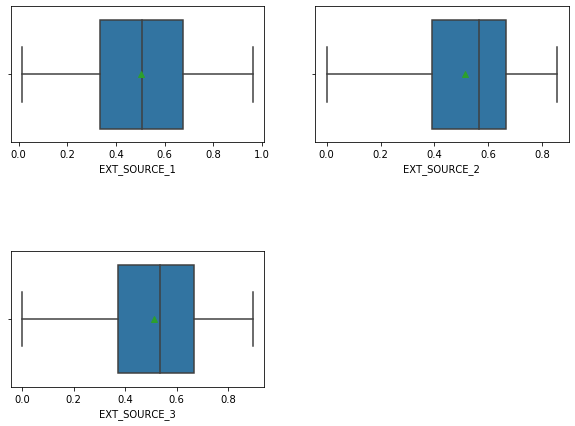

In [17]:
count = 1
plt.figure(figsize = (10,7))
for x in ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']: 
    plt.subplot(2,2,count)
    sns.boxplot(apply_data[x],showmeans = True)
    count +=1
plt.subplots_adjust(hspace = 0.8)

### Though data from Source 1 has `56.38 %` missing values it is perfectly normally distributed . It may not be useful for EDA but it is very useful while developing models . So before lets backup it and save for future modelling purposes

In [18]:

Source1_back = apply_data['EXT_SOURCE_1'][:]



In [19]:
missing = round((100 * apply_data.isnull().sum())/len(apply_data.index),2).sort_values(ascending = False)
above_10 = missing[missing > 10]
above_10

EXT_SOURCE_1                  56.38
OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
dtype: float64

## `The type of occupation is an important variable in the analysis. Though in EDA imputation is not required .When building models It is better to impute missing values with 'mode' as it is a categorical column. So , in that case we should impute with 'Laborers' . HERE WE CHOOSE NOT TO DROP OCCUPATION_TYPE AS IT IS A VERY VERY IMPORTANT FACTOR IN LOAN DEFAULT`

In [20]:
apply_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

### Lets deal with No of enquiries to credit bureau at each time frame before application process

In [21]:
credit_bureau = missing[missing == 13.50]
credit_bureau

AMT_REQ_CREDIT_BUREAU_YEAR    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
dtype: float64

In [22]:
enq_to_bureau = apply_data[credit_bureau.index][:]

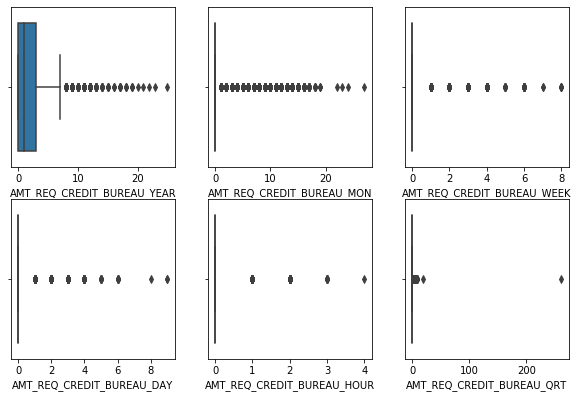

In [23]:
c = 1
plt.figure(figsize = (10,10))
for x in enq_to_bureau.columns:
    plt.subplot(3,3,c)
    sns.boxplot(enq_to_bureau[x].dropna())
    c += 1

### There are lots of outliers in these variables which indicates generally enquiry to credit bureau is done only when additional scrutiny is required. Also , note that 'AMT_REQ_CREDIT_BUREAU_QRT' has a outlier which is very unconventional. Lets treat it soon

### The no of enquires to credit bureau cannot take non integer values and also as a result for most of the cases its zero . For imputation we can use 'zero'

In [24]:
for x in enq_to_bureau.columns:
    print(enq_to_bureau[x].value_counts()[0:5])

0.0    71801
1.0    63405
2.0    50192
3.0    33628
4.0    20714
5.0    12052
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64
0.0    222233
1.0     33147
2.0      5386
3.0      1991
4.0      1076
5.0       602
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    215417
1.0     33862
2.0     14412
3.0      1717
4.0       476
5.0        64
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64


#### AMT_REQ_CREDIT_BUREAU_HOUR -  Number of enquiries to Credit Bureau about the client one hour before application
#### AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
#### AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
#### AMT_REQ_CREDIT_BUREAU_MON -  Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
#### AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
#### AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)]

## So if we add all the rows we will get no of `total enquires` to credit bureau about the applicant in THE LAST ONE YEAR BEFORE APPLICATION . By summing all such columns we can analyize data without loss and at the same time reduce the complexity of the analysis

In [25]:

apply_data['Enq_in_1fullyear'] = apply_data[credit_bureau.index].sum(axis = 1,skipna = False)

In [26]:
apply_data = apply_data[apply_data.columns.difference(credit_bureau.index)] #removing credit_bureau data after summing them up
missing = round((100 * apply_data.isnull().sum())/len(apply_data.index),2).sort_values(ascending = False)
missing[:12]


EXT_SOURCE_1                56.38
OCCUPATION_TYPE             31.35
EXT_SOURCE_3                19.83
Enq_in_1fullyear            13.50
NAME_TYPE_SUITE              0.42
DEF_30_CNT_SOCIAL_CIRCLE     0.33
OBS_30_CNT_SOCIAL_CIRCLE     0.33
DEF_60_CNT_SOCIAL_CIRCLE     0.33
OBS_60_CNT_SOCIAL_CIRCLE     0.33
EXT_SOURCE_2                 0.21
AMT_GOODS_PRICE              0.09
FLAG_DOCUMENT_15             0.00
dtype: float64

### We have observed a outlier in 'AMT_REQ_CREDIT_BUREAU_QRT' which will be reflected in the sum.Lets treat it 

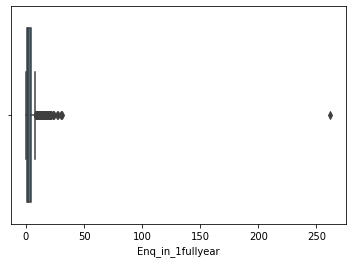

In [27]:
sns.boxplot(apply_data['Enq_in_1fullyear'])

In [28]:
apply_data[apply_data['Enq_in_1fullyear'] > 250]

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
SK_ID_CURR                                                               
377322          30393.0   1035000.0        1035000.0          360000.0   

            CNT_CHILDREN  CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  \
SK_ID_CURR                                                          
377322                 1              3.0           F      -13590   

            DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  \
SK_ID_CURR                                                           
377322              -3336            -3267                  -695.0   

            DAYS_REGISTRATION  DEF_30_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                                
377322                -3629.0                       0.0   

            DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_1  EXT_SOURCE_2  \
SK_ID_CURR                                                         
377322                           0.0       0.50296      0.663803   

            EXT_SOURCE_3  Enq_in_1fullyear  FLAG_CONT_MOBILE  \
SK_ID_CURR                                                     
377322               NaN             262.0                 1   

            FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
SK_ID_CURR                                                         
377322                     0                 0                 0   

            FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
SK_ID_CURR                                                         
377322                     0                 0                 0   

            FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
SK_ID_CURR                                                         
377322                     0                 0                 0   

            FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  FLAG_DOCUMENT_20  \
SK_ID_CURR                                                        
377322                     0                0                 0   

            FLAG_DOCUMENT_21  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
SK_ID_CURR                                                       
377322                     0                1                0   

            FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
SK_ID_CURR                                                      
377322                    0                0                0   

            FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_EMAIL  FLAG_EMP_PHONE  \
SK_ID_CURR                                                                 
377322                    0                0           0               1   

            FLAG_MOBIL FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_PHONE  \
SK_ID_CURR                                                        
377322               1            N               Y           1   

            FLAG_WORK_PHONE  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                                      
377322                    0                       19                        0   

            LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE  \
SK_ID_CURR                                                   
377322                                0         Cash loans   

           NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
SK_ID_CURR                                                             
377322        Higher education            Married  House / apartment   

           NAME_INCOME_TYPE NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                                              
377322              Working   Unaccompanied                       3.0   

            OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  \
SK_ID_CURR                                                                     
377322                           3.0     Accountants  Business Entity Type 2   

            REGION_POPULATION_RELATIVE  RE

### Now after removing that row we can see that our boxplot is realistic

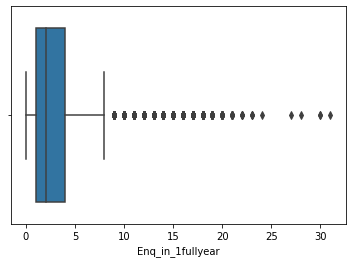

In [29]:
apply_data = apply_data[ apply_data['Enq_in_1fullyear'] != 262.0]
sns.boxplot(apply_data['Enq_in_1fullyear'])

## Lets check the outliers and spread of the columns which represents the social surroundings of the applicant

In [30]:
Social_circle = missing[missing == 0.33]

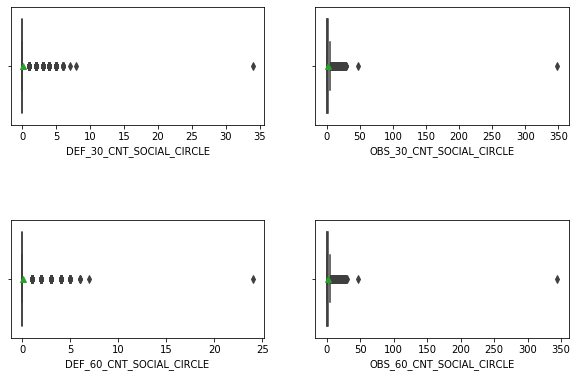

In [31]:
count = 1
plt.figure(figsize = (10,10))
for x in Social_circle.index:
    plt.subplot(3,2,count)
    sns.boxplot(apply_data[x],showmeans = True)
    count +=1
plt.subplots_adjust(hspace = 0.8)    

### One datapoint is way far from the cluster in all 4 of the variables. Is it of the same applicant? Lets check it

In [32]:
outlier = apply_data[apply_data['OBS_60_CNT_SOCIAL_CIRCLE'] > 300]
outlier[Social_circle.index]

DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                                       
272071                          34.0                     348.0   

            DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  
SK_ID_CURR                                                      
272071                          24.0                     344.0

### Yes, as predicted the outliers belong to the same row . So filter the data without including that row

In [33]:
apply_data = apply_data[apply_data['OBS_60_CNT_SOCIAL_CIRCLE'] != 344.0 ]

## The distributions of 'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE' look identical. Lets check the co-relation. If its highly co-related it means the are almost same and hence we can choose to drop one of them

In [34]:
apply_data[['OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].corr()

OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE                   1.00000                   0.99838
OBS_30_CNT_SOCIAL_CIRCLE                   0.99838                   1.00000

In [35]:
del apply_data['OBS_30_CNT_SOCIAL_CIRCLE']

In [36]:
apply_data[['DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']].corr() 

DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE                  1.000000                  0.858344
DEF_30_CNT_SOCIAL_CIRCLE                  0.858344                  1.000000

In [37]:
del apply_data['DEF_30_CNT_SOCIAL_CIRCLE']   #using same philosophy

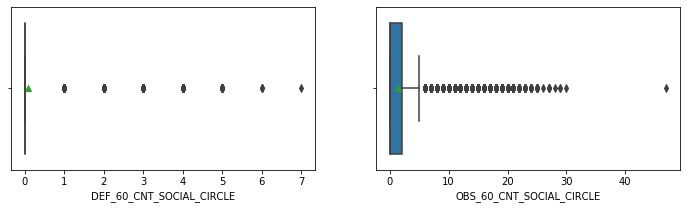

In [38]:
count = 1
plt.figure(figsize = (12,3))
for x in Social_circle.index:
    if x in apply_data.columns:
        plt.subplot(1,2,count)
        sns.boxplot(apply_data[x],showmeans = True)
        count +=1
plt.subplots_adjust(hspace = 0.8)    

## Lets move on to next group of varibales which has only 2 unique values(1 means 'Yes' and 0 means 'No'). 

In [39]:
Flag_col = []      #running a loop and adding all column names starting with flag in flag_col

for x in apply_data.columns:
    if x.split('_')[0] == 'FLAG':
        Flag_col.append(x)

In [40]:
apply_data[Flag_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 100002 to 456255
Data columns (total 28 columns):
FLAG_CONT_MOBILE    307509 non-null int64
FLAG_DOCUMENT_10    307509 non-null int64
FLAG_DOCUMENT_11    307509 non-null int64
FLAG_DOCUMENT_12    307509 non-null int64
FLAG_DOCUMENT_13    307509 non-null int64
FLAG_DOCUMENT_14    307509 non-null int64
FLAG_DOCUMENT_15    307509 non-null int64
FLAG_DOCUMENT_16    307509 non-null int64
FLAG_DOCUMENT_17    307509 non-null int64
FLAG_DOCUMENT_18    307509 non-null int64
FLAG_DOCUMENT_19    307509 non-null int64
FLAG_DOCUMENT_2     307509 non-null int64
FLAG_DOCUMENT_20    307509 non-null int64
FLAG_DOCUMENT_21    307509 non-null int64
FLAG_DOCUMENT_3     307509 non-null int64
FLAG_DOCUMENT_4     307509 non-null int64
FLAG_DOCUMENT_5     307509 non-null int64
FLAG_DOCUMENT_6     307509 non-null int64
FLAG_DOCUMENT_7     307509 non-null int64
FLAG_DOCUMENT_8     307509 non-null int64
FLAG_DOCUMENT_9     307509 non-null int64
FL

### Lets inspect why two of the columns are of datatype 'object'

In [41]:
apply_data[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_PHONE']].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_PHONE
SK_ID_CURR                                         
100002                N               Y           1
100003                N               N           1
100004                Y               Y           1
100006                N               Y           0
100007                N               Y           0

### Lets change 'N' to 0 and 'Y' to 1 so that we can convert standardize it across 'flag' columns

In [42]:
apply_data['FLAG_OWN_CAR'] = apply_data['FLAG_OWN_CAR'].map({'N':0,'Y':1})
apply_data['FLAG_OWN_REALTY'] = apply_data['FLAG_OWN_REALTY'].map({'N':0,'Y':1})

In [43]:
apply_data[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 100002 to 456255
Data columns (total 2 columns):
FLAG_OWN_CAR       307509 non-null int64
FLAG_OWN_REALTY    307509 non-null int64
dtypes: int64(2)
memory usage: 7.0 MB


### SO WE HAVE CONVERTED DATATYPE 'OBJECT' TO 'INT'

In [44]:
Doc_flag = []  #making a list of column names which has the word 'document'

for x in Flag_col:
    if x.split('_')[1] == 'DOCUMENT':
        Doc_flag.append(x)

# PERCENTAGE OF APPLICANTS WHO SUBMITTED EACH DOCUMENT
perc_doc = round((100*apply_data[Doc_flag].sum())/len(apply_data[Doc_flag]),2).sort_values(ascending = False)
perc_doc

FLAG_DOCUMENT_3     71.00
FLAG_DOCUMENT_6      8.81
FLAG_DOCUMENT_8      8.14
FLAG_DOCUMENT_5      1.51
FLAG_DOCUMENT_16     0.99
FLAG_DOCUMENT_18     0.81
FLAG_DOCUMENT_9      0.39
FLAG_DOCUMENT_11     0.39
FLAG_DOCUMENT_13     0.35
FLAG_DOCUMENT_14     0.29
FLAG_DOCUMENT_15     0.12
FLAG_DOCUMENT_19     0.06
FLAG_DOCUMENT_20     0.05
FLAG_DOCUMENT_17     0.03
FLAG_DOCUMENT_21     0.03
FLAG_DOCUMENT_7      0.02
FLAG_DOCUMENT_4      0.01
FLAG_DOCUMENT_2      0.00
FLAG_DOCUMENT_12     0.00
FLAG_DOCUMENT_10     0.00
dtype: float64

### We can see that except for 'Flag_Document_3' the submission rate is two low for other documents. Those data doesnot play much critical role in the analysis. Lets drop those

In [45]:
apply_data = apply_data[apply_data.columns.difference(perc_doc.index.difference(['FLAG_DOCUMENT_3']))] 

## We also need to check the consistency in submission of various contact details . Lets check it

In [46]:
cont_detail = list(set(Flag_col).difference(perc_doc.index ))
perc_contact = round((100*apply_data[cont_detail].sum())/len(apply_data[cont_detail]),2)
perc_contact = perc_contact[perc_contact.index.difference(['FLAG_OWN_REALTY','FLAG_OWN_CAR'])].sort_values(ascending = False)
perc_contact


FLAG_MOBIL          100.00
FLAG_CONT_MOBILE     99.81
FLAG_EMP_PHONE       81.99
FLAG_PHONE           28.11
FLAG_WORK_PHONE      19.94
FLAG_EMAIL            5.67
dtype: float64

In [47]:
apply_data[perc_contact.index].head()

FLAG_MOBIL  FLAG_CONT_MOBILE  FLAG_EMP_PHONE  FLAG_PHONE  \
SK_ID_CURR                                                             
100002               1                 1               1           1   
100003               1                 1               1           1   
100004               1                 1               1           1   
100006               1                 1               1           0   
100007               1                 1               1           0   

            FLAG_WORK_PHONE  FLAG_EMAIL  
SK_ID_CURR                               
100002                    0           0  
100003                    0           0  
100004                    1           0  
100006                    0           0  
100007                    0           0

### creating a column named 'contact_score' where the person who has submitted all the contact related information gets a score of 100 and who has submitted no contact information get a score of zero and accordingly

In [48]:

apply_data['contact_score'] = round((100 * apply_data[perc_contact.index].sum(axis = 1)) / len(perc_contact.index),2)

# remove the contact columns as we have created a new variable called contact_score by merging all of it
apply_data = apply_data[apply_data.columns.difference(perc_contact.index)]

apply_data['contact_score'].head()

SK_ID_CURR
100002    66.67
100003    66.67
100004    83.33
100006    50.00
100007    50.00
Name: contact_score, dtype: float64

### Lets get to the next type of variable( i.e columns with days)

In [49]:
days_col = []

for x in apply_data.columns:
    if x.split('_')[0] == 'DAYS':
        days_col.append(x)
        
apply_data[days_col].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
SK_ID_CURR                                               
100002           -9461           -637            -2120   
100003          -16765          -1188             -291   
100004          -19046           -225            -2531   
100006          -19005          -3039            -2437   
100007          -19932          -3038            -3458   

            DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  
SK_ID_CURR                                             
100002                     -1134.0            -3648.0  
100003                      -828.0            -1186.0  
100004                      -815.0            -4260.0  
100006                      -617.0            -9833.0  
100007                     -1106.0            -4311.0

## ALL ARE NEGATIVE VALUES INCLUDING DAYS_BIRTH. BUT WHY? LETS SEE THE SPREAD OF THE DATA

In [50]:
apply_data[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  \
count  307509.000000  307509.000000    307509.000000           307508.000000   
mean   -16037.022295   63815.478032     -2994.203724             -962.860622   
std      4363.987508  141276.124313      1509.454737              826.810863   
min    -25229.000000  -17912.000000     -7197.000000            -4292.000000   
25%    -19682.000000   -2760.000000     -4299.000000            -1570.000000   
50%    -15750.000000   -1213.000000     -3254.000000             -757.000000   
75%    -12413.000000    -289.000000     -1720.000000             -274.000000   
max     -7489.000000  365243.000000         0.000000                0.000000   

       DAYS_REGISTRATION  
count      307509.000000  
mean        -4986.133456  
std          3522.893612  
min        -24672.000000  
25%         -7480.000000  
50%         -4504.000000  
75%         -2010.000000  
max             0.000000

## If we see minimum and maximum closely we can understand that the days are relative from the date of application ( For ex: Here Days_birth column indicates the no of days before the application date the applicant was born).Lets plot it to find out if there is any discrepancy in the data

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


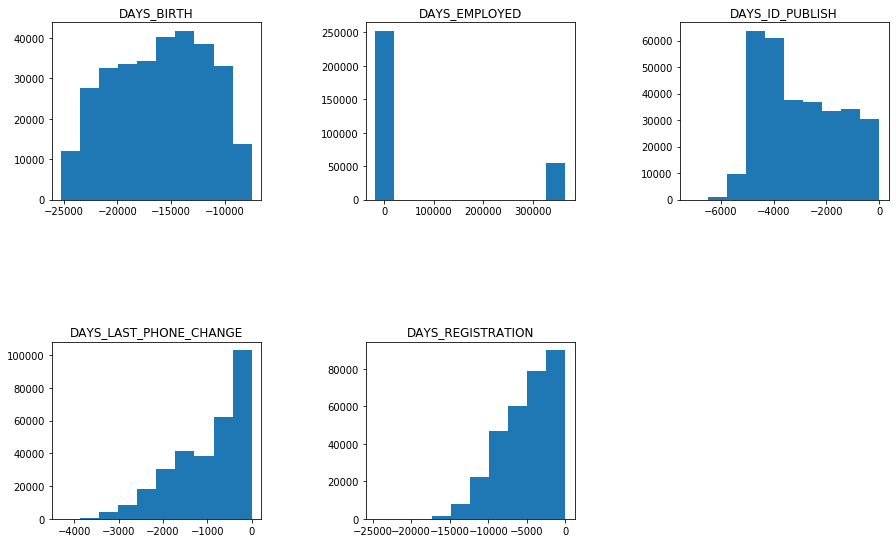

In [51]:

c = 1
plt.figure(figsize = (15,15))
for x in days_col:
    plt.subplot(3,3,c)
    plt.title(x)
    plt.hist(apply_data[x])
    c +=1
    
plt.subplots_adjust(hspace = 0.8,wspace = 0.5)

## All columns seem to be fine except Days_employed which has positive values that too at a same point . 300000/365 = 821 years which is not possible . Lets inspect all the values of 'DAYS_EMPLOYED' above 300000

55374 entries are above 1000 years which is not possible.Lets delete it

In [52]:
(apply_data[days_col].describe())/365   #to view in terms of years(max is 1000 years for days_employed.So there is discrepency)

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  \
count  842.490411     842.490411       842.490411              842.487671   
mean   -43.937047     174.836926        -8.203298               -2.637974   
std     11.956130     387.057875         4.135492                2.265235   
min    -69.120548     -49.073973       -19.717808              -11.758904   
25%    -53.923288      -7.561644       -11.778082               -4.301370   
50%    -43.150685      -3.323288        -8.915068               -2.073973   
75%    -34.008219      -0.791781        -4.712329               -0.750685   
max    -20.517808    1000.665753         0.000000                0.000000   

       DAYS_REGISTRATION  
count         842.490411  
mean          -13.660640  
std             9.651763  
min           -67.594521  
25%           -20.493151  
50%           -12.339726  
75%            -5.506849  
max             0.000000

In [53]:
apply_data['DAYS_EMPLOYED'][apply_data['DAYS_EMPLOYED'] > 300000].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

### For data above 300000 there is only one unique value which has repeated 55374 times. Lets replace that value to 'null'

In [54]:
apply_data['DAYS_EMPLOYED'] = apply_data['DAYS_EMPLOYED'].replace(365243,np.nan)

### Now, lets check the distribution if all the data is relative to application date

Text(0.5, 0, '')

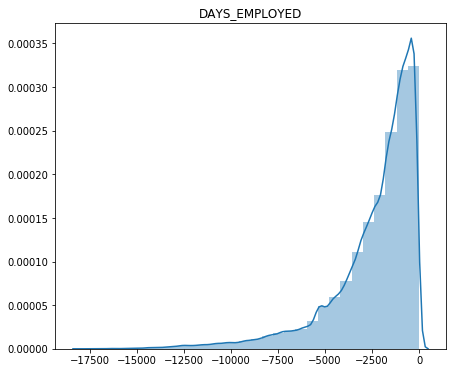

In [55]:
plt.figure(figsize = (7,6))
sns.distplot(apply_data['DAYS_EMPLOYED'].dropna(),hist = True,bins = 30)
plt.title('DAYS_EMPLOYED')
plt.xlabel('')

### Relative dates are huge numbers and analysis on such data is very tedious. So, lets convert it into years and positive figures so that we can make interpretations on the data more easy.

In [56]:
year_col = []     # apppending the newly formed column names with 'years' to year_col

for x in days_col:
    #changing 'days' to 'years' AND CONVERTING TO INTEGER BECAUSE WE NEED TO **'ROUNDDOWN'** YEARS FOR AGE
    apply_data['YEARS_'+'_'.join(x.split('_')[1:])] = apply_data[x]/-365
    apply_data['YEARS_'+'_'.join(x.split('_')[1:])] = apply_data['YEARS_'+'_'.join(x.split('_')[1:])].astype(int,errors = 'ignore')
    del apply_data[x]  #dropping old columns with 'dates'
    year_col.append('YEARS_'+'_'.join(x.split('_')[1:]))

### Lets check other columns

In [57]:
apply_data['ORGANIZATION_TYPE'].value_counts()[:5]

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

### An organization type named XNA is dubious. Lets check the frequency distribution of GENDER where we have observed values named 'XNA'. 

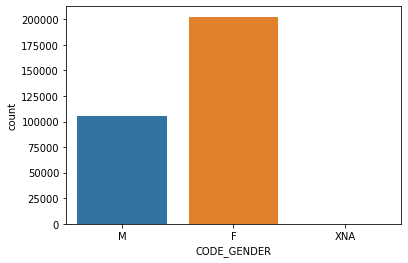

In [58]:
sns.countplot(apply_data['CODE_GENDER'])

### XNA and XAP actually are null objects which was mistreated. Lets replace such values with np.nan

In [59]:
apply_data = apply_data.replace('XNA', np.nan)
apply_data = apply_data.replace('XAP', np.nan)

### We have checked most of the columns which are useful for our analysis. Lets check the spread of 'AMT' columns and remove unrealistic data points

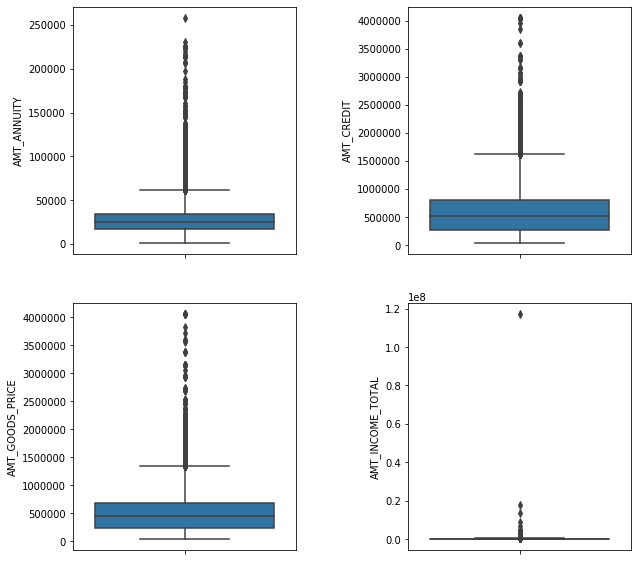

In [60]:
c = 1

plt.figure(figsize = (10,10))
for x in apply_data.columns:
    if x.split('_')[0] == 'AMT':
        plt.subplot(2,2,c)
        sns.boxplot(y = apply_data[x].dropna())
        c += 1
        
plt.subplots_adjust(wspace = 0.5)

#### There is one data point in 'INCOME' which is very far away from the distribution.Lets remove it

In [61]:
apply_data = apply_data[apply_data['AMT_INCOME_TOTAL'] != apply_data['AMT_INCOME_TOTAL'].max()]

### Let's make bins based on age of the applicants and years employed .Also,lets plot the no of total applicants under each bin

Text(0.5, 0.98, 'Count of people in each sub-category for AGE and EXPERIENCE respectively')

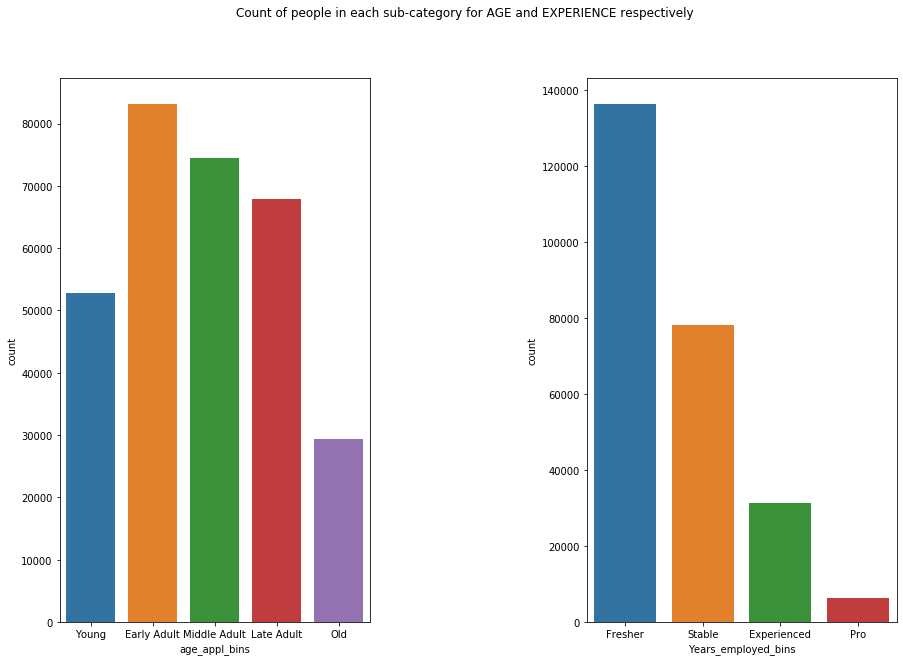

In [62]:
apply_data['age_appl_bins'] = pd.cut(apply_data['YEARS_BIRTH'],bins = [20,30,40,50,60,70],labels = ['Young','Early Adult','Middle Adult','Late Adult','Old'],include_lowest = True)
# using pd.cut for binning and dividing into categories
apply_data['Years_employed_bins'] = pd.cut(apply_data['YEARS_EMPLOYED'],bins = [0,5,12,25,50],labels = ['Fresher','Stable','Experienced','Pro'],include_lowest = True)



count = 1
plt.figure(figsize = (15,10))
for x in apply_data.columns:
    if x.split('_')[-1] == 'bins':
        plt.subplot(1,2,count)
        sns.countplot(apply_data[x])
        count += 1
        
plt.subplots_adjust(wspace = 0.7)
plt.suptitle('Count of people in each sub-category for AGE and EXPERIENCE respectively')

### OBSERVATION - `Early adults and Middle adults are people in ages 20-40.Freshers have less than 5 years of experience. We can hypothesize that greater proportion of people who claim loan start their careers late`

### One more variable when binned will be very useful for our analysis i.e (AMT_CREDIT). Lets bin it according to quartile values so that we can use it as hue in further analysis

In [63]:
apply_data['Credit_bins'] = pd.qcut(apply_data['AMT_CREDIT'], q = 4,labels = ['Low','Low-Mid','High-Mid','High'])

# DATA ANALYSIS

## Before moving to analysis lets find the imbalance %

In [64]:
imbalance = round(100 * apply_data['TARGET'].value_counts()/len(apply_data['TARGET']),3)
imbalance

0    91.927
1     8.073
Name: TARGET, dtype: float64

#### There is a huge imbalance in the data. When developing machine learning models we need to choose balancing techniques like sampling to make the data consistent . As our focus is currently on the EDA lets focus on the data in hand to see patterns

Text(0.5, 1.0, 'IMBALANCE PERCENTAGE')

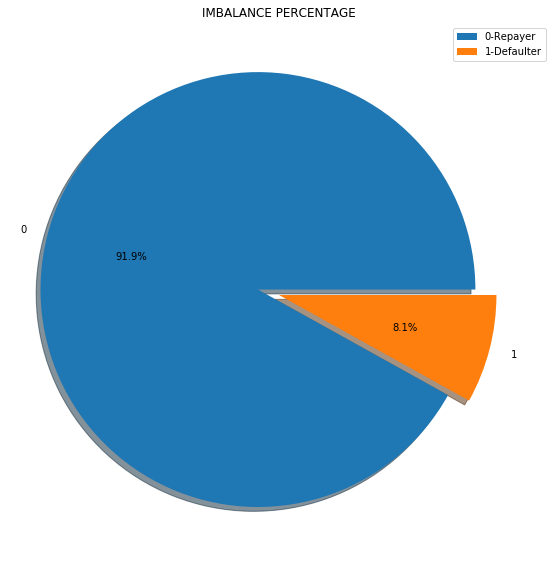

In [65]:
plt.figure(figsize = (10,10))
plt.pie(imbalance,labels = imbalance.index,autopct='%1.1f%%',shadow = True,explode = (0.1,0))
plt.legend(['0-Repayer','1-Defaulter'])
plt.title('IMBALANCE PERCENTAGE')

### OBSERVATION - `THE DATA IS HIGHLY IMBALNCED`

#### Lets make a new derived column from our target column so that we can use them for labels and grouping while plotting data in the further analysis. Lets also divide the dataframe into 2 parts based on 'Defaulters' and 'Repayers' which will be useful for analysing data in chunks

In [66]:
apply_data['TARGET(YES/NO)'] = apply_data['TARGET'].map({0:'Repayers',1:'Defaulter'})

In [67]:
target_zero = apply_data[apply_data['TARGET'] == 0]
target_one = apply_data[apply_data['TARGET'] == 1]

## UNIVARIATE ANALYSIS ON CATEGORICAL DATA

`As there are multiple columns it would be difficult to choose required categorical columns. Let us make a dictionary of columns of DATA-TYPE 'OBJECT' with their respective unique values so that we can judge what type of plots are suitable for each variable`

In [68]:
uniq_val_dict = {}

for x in apply_data.columns:
    if (apply_data[x].dtypes == np.object) | (apply_data[x].dtype.name == 'category'):
        uniq_val_dict[x] = len(apply_data[x].value_counts())

In [69]:
uniq_val_dict

{'CODE_GENDER': 2,
 'NAME_CONTRACT_TYPE': 2,
 'NAME_EDUCATION_TYPE': 5,
 'NAME_FAMILY_STATUS': 6,
 'NAME_HOUSING_TYPE': 6,
 'NAME_INCOME_TYPE': 8,
 'NAME_TYPE_SUITE': 7,
 'OCCUPATION_TYPE': 18,
 'ORGANIZATION_TYPE': 57,
 'WEEKDAY_APPR_PROCESS_START': 7,
 'age_appl_bins': 5,
 'Years_employed_bins': 4,
 'Credit_bins': 4,
 'TARGET(YES/NO)': 2}

### making a list of the two seperated dataframes for using in loops while plotting

In [70]:
the_mix = [target_zero,target_one]
dic = {0:'Repayer',1:'Defaulter'}     #creating a dictionary to use for labels and legends while plotting data

#### `command to plot data without having to scroll`

In [71]:
%%javascript   
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
} 

<IPython.core.display.Javascript object>

## Most of the object type columns have less sub - categories except Organization type. When we use count or % bar plots to represent data with huge subcategories it will be difficult to understand the distribition. Thus, as there is huge amount of data available lets plot a `rank frequency distribution` on a 'log-log' scale for both repayers and defaulters individually

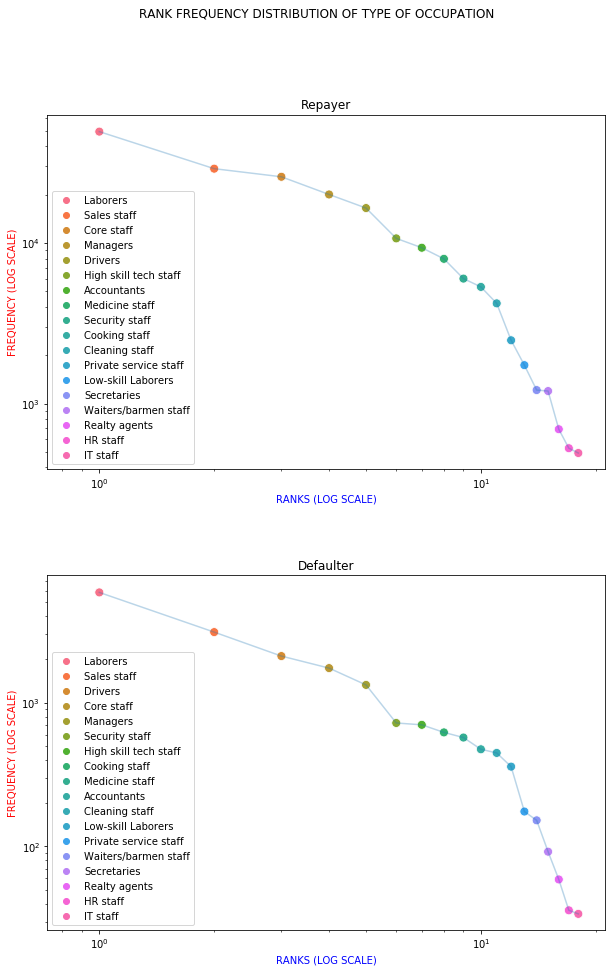

In [72]:
plt.figure(figsize = (10,15))
count = 1
for x in the_mix:  #looping on the dataframes
    
    frequency = x['OCCUPATION_TYPE'].value_counts().to_frame()  #frequency distribution sorted in descending order
    frequency.index = range(1,len(frequency.index)+1) #starting the index with 1 to reprsent them as ranks
    frequency.columns = ['FREQUENCY']
    
    plt.subplot(2,1,count) #subplot for 'repayer' adn 'defaulter'
    sns.lineplot(x = frequency.index,y = frequency['FREQUENCY'],alpha=0.3,label = '') #line plot with transparency
    sns.scatterplot(x = frequency.index , y = frequency['FREQUENCY'],hue = x['OCCUPATION_TYPE'].value_counts().index ,s = 80 )
    plt.xscale('log') #changing the scales to 'log'
    plt.yscale('log')
    plt.xlabel('RANKS (LOG SCALE)',color = 'b')
    plt.ylabel('FREQUENCY (LOG SCALE)',color = 'r')
    plt.title(dic[x['TARGET'].unique()[0]]) #using dictionary 'dic' for titling
    count += 1

plt.suptitle('RANK FREQUENCY DISTRIBUTION OF TYPE OF OCCUPATION')
plt.subplots_adjust(hspace = 0.3)


### OBSERVATION - `Though both distributions look almost similar we can see a bump for 6-7 occupations in the lower middle end for Defaulter Data which indicates occupations ranging from Security staff to private service staff are occupations which are risk prone`

## AS THE DATA IS VERY INCONSISTENT IF WE PLOT BASED ON COUNT OF EACH SUB-CATEGORY IT WOULD BE DIFFICULT TO COMPARE  HOW THE DISTRIBUTION VARIES FOR 'REPAYERS' and 'DEFAULTERS' . SO LETS PLOT IT BASED ON % CONTRIBUTION OF EACH SUB- SECTOR FOR TARGET '1' AND TARGET '0'. (KIND OF BALANCING DATA)

`FOR Ex: If 3/4 of the defaulters are Married and only 1/4 of the repayers are Married we can hypothesize that there is enough risk associated with Married clients`

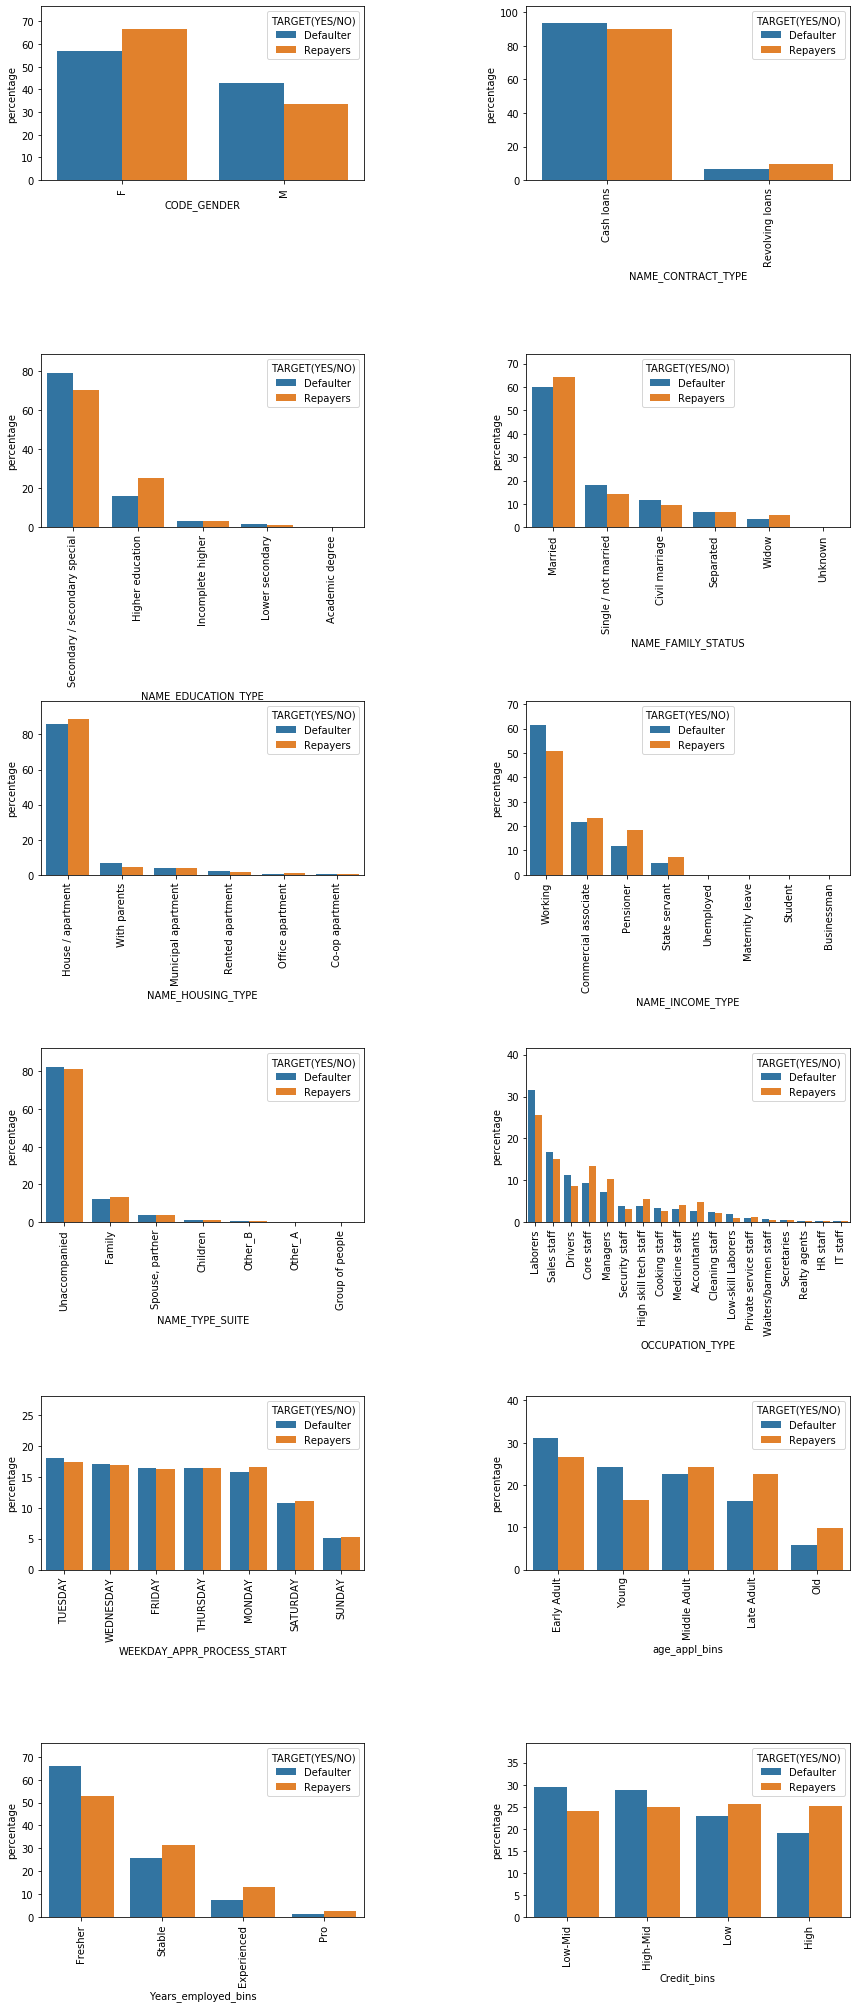

In [73]:
c = 1

plt.figure(figsize = (12,28))
for x in uniq_val_dict: #dict consisting categorical columns
    if x not in ['ORGANIZATION_TYPE','TARGET(YES/NO)']: 
        plt.subplot(6,2,c)
        
        # grouping data based on Target column , counting values, converting into % and then plotting it
        
        ccu = apply_data.groupby(['TARGET(YES/NO)'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'TARGET(YES/NO)')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1

plt.subplots_adjust(wspace = 0.5,hspace = 1)



### OBSERVATION - ` 1) FEMALES ARE RELATIVELY RISK FREE THAN MEN `
### `2) GREATER PROPORTION OF DEFAULTERS ARE MARRIED (MAY BE MIDDLE AGED) `
### `3) SURPRSINGLY PRISONERS TEND TO REPAY LOAN MORE OFTEN`
### `4) ALL LABOUR GROUPS ARE OCCUPATIONS WHERE HIGH RISK CAN BE SEEN`
### `5) WE HAVE ALREADY HYPOTHESISED THAT PEOPLE WHO APPLY FOR LOAN TEND TO GET INTO EMPLOYMENT VERY LATE. SO YOUNG PEOPLE ARE MOSTLY UNEMPLOYED OR RECENT JOB HOLDERS. IT IS ALWAYS RISK APPROVING THEIR LOAN`

## UNIVARIATE CONTINUOUS

### Filtering columns with dtype 'float' or 'int'

In [74]:
numeric_only = apply_data.loc[:,(apply_data.dtypes == np.float) | (apply_data.dtypes == np.int)]
numeric_only.head()

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
SK_ID_CURR                                                               
100002          24700.5    406597.5         351000.0          202500.0   
100003          35698.5   1293502.5        1129500.0          270000.0   
100004           6750.0    135000.0         135000.0           67500.0   
100006          29686.5    312682.5         297000.0          135000.0   
100007          21865.5    513000.0         513000.0          121500.0   

            CNT_CHILDREN  CNT_FAM_MEMBERS  DEF_60_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                                            
100002                 0              1.0                       2.0   
100003                 0              2.0                       0.0   
100004                 0              1.0                       0.0   
100006                 0              2.0                       0.0   
100007                 0              1.0                       0.0   

            EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  Enq_in_1fullyear  \
SK_ID_CURR                                                               
100002          0.083037      0.262949      0.139376               1.0   
100003          0.311267      0.622246           NaN               0.0   
100004               NaN      0.555912      0.729567               0.0   
100006               NaN      0.650442           NaN               NaN   
100007               NaN      0.322738           NaN               0.0   

            FLAG_DOCUMENT_3  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                                                   
100002                    1             0                1   
100003                    1             0                0   
100004                    0             1                1   
100006                    1             0                1   
100007                    0             0                1   

            HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                     
100002                           10                        0   
100003                           11                        0   
100004                            9                        0   
100006                           17                        0   
100007                           11                        1   

            LIVE_REGION_NOT_WORK_REGION  OBS_60_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                                          
100002                                0                       2.0   
100003                                0                       1.0   
100004                                0                       0.0   
100006                                0                       2.0   
100007                                0                       0.0   

            REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT  \
SK_ID_CURR                                                     
100002                        0.018801                     2   
100003                        0.003541                     1   
100004                        0.010032                     2   
100006                        0.008019                     2   
100007                        0.028663                     2   

            REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
SK_ID_CURR                                                        
100002                                2                       0   
100003                                1                       0   
100004                                2                       0   
100006                                2                       0   
100007                                2                       0   

            REG_CITY_NOT_WORK_CITY  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                       
100002                           0                       

## Before deciding which variables to choose lets see the co-relation between 'TARGET' and other columns . If we find high co-relation with 'TARGET' variable we can use that columns to find patterns when segmented based on 'TARGET'

In [75]:
target_corr = numeric_only.corr().loc[numeric_only.corr().index.difference(['TARGET']),'TARGET'].sort_values(ascending = True)

target_corr = target_corr.to_frame()
target_corr.columns = ['Co-relation with ' + str(target_corr.columns[0])]
target_corr

Co-relation with TARGET
EXT_SOURCE_3                               -0.178899
EXT_SOURCE_2                               -0.160454
EXT_SOURCE_1                               -0.155321
YEARS_BIRTH                                -0.078229
YEARS_EMPLOYED                             -0.074952
YEARS_LAST_PHONE_CHANGE                    -0.055208
YEARS_ID_PUBLISH                           -0.051129
YEARS_REGISTRATION                         -0.041983
AMT_GOODS_PRICE                            -0.039643
REGION_POPULATION_RELATIVE                 -0.037219
AMT_CREDIT                                 -0.030369
HOUR_APPR_PROCESS_START                    -0.024172
FLAG_OWN_CAR                               -0.021845
AMT_INCOME_TOTAL                           -0.020458
AMT_ANNUITY                                -0.012817
FLAG_OWN_REALTY                            -0.006155
LIVE_REGION_NOT_WORK_REGION                 0.002821
REG_REGION_NOT_LIVE_REGION                  0.005577
REG_REGION_NOT_WORK_REGION                  0.006944
CNT_FAM_MEMBERS                             0.009297
OBS_60_CNT_SOCIAL_CIRCLE                    0.009495
Enq_in_1fullyear                            0.011234
CNT_CHILDREN                                0.019179
contact_score                               0.020781
DEF_60_CNT_SOCIAL_CIRCLE                    0.031569
LIVE_CITY_NOT_WORK_CITY                     0.032526
FLAG_DOCUMENT_3                             0.044340
REG_CITY_NOT_LIVE_CITY                      0.044399
REG_CITY_NOT_WORK_CITY                      0.051003
REGION_RATING_CLIENT                        0.058903
REGION_RATING_CLIENT_W_CITY                 0.060897

### OBSERVATION - `NOT MUCH CO-RELATION CAN BE OBSERVED WITH TARGET COLUMN .BUT CREDIT SCORES HAVE A LOW NEGATIVE CO-RELATION AS EXPECTED . THIS IS ALSO A INDICATOR THAT CREDIT SCORES MUST NOT ONLY BE THE METRIC TO APPROVE LOAN`

## `Note: Most of the variables in the data are categorical data with only two sub-categories converted to '1' and '0'('YES' /'NO')  .We know that it is legal to check the co-relation between the dichotomical classified data . But we can also measure the relationship between categorical data with 2 classes and a continuous variable which is called POINT BISERIAL CO-RELATION . Anyways the result is the same when you use Pearson r . We can see that co-relation is same when we measure using point biseral or pearson-r `

In [76]:
from scipy.stats import pointbiserialr
pointbiserialr(apply_data['AMT_CREDIT'],apply_data['TARGET'])

PointbiserialrResult(correlation=-0.03036893260797937, pvalue=1.1528753326429193e-63)

In [77]:
target_corr.loc['AMT_CREDIT',:]

Co-relation with TARGET   -0.030369
Name: AMT_CREDIT, dtype: float64

### We can see that Credit score from external sources is slightly negatively co-related with target and 'AMT' columns being primary variables in the analysis lets choose these to plot 'SEGMENTED UNIVARIATE' plots

In [78]:
Amt_ext_col = []   #making a empty list and adding all columns starting with 'AMT' and 'EXT'

for x in apply_data.columns:
    if x.split('_')[0] in ['AMT','EXT']:  
        Amt_ext_col.append(x)


uni_cont = Amt_ext_col + ['YEARS_EMPLOYED']
uni_cont = sorted(uni_cont)
uni_cont

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_EMPLOYED']

In [79]:
tem = pd.Series(index = uni_cont).to_frame().T    #converting the list to columns of a df as we can easily filter columns by using the function 'difference'


### As we have not removed outliers lets plot a boxplot to check the skewness of Amt columns and Credit scores data for entire population and also lets check the distribution of the columns after segmentation based on 'TARGET'

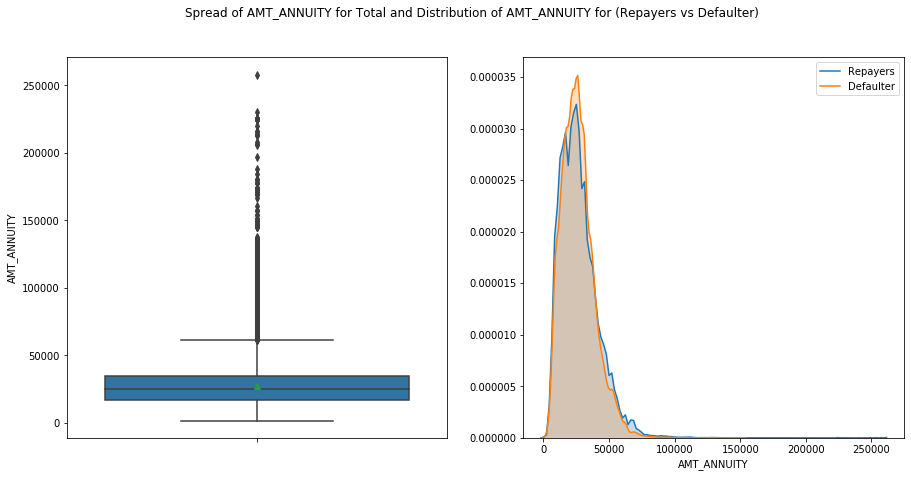

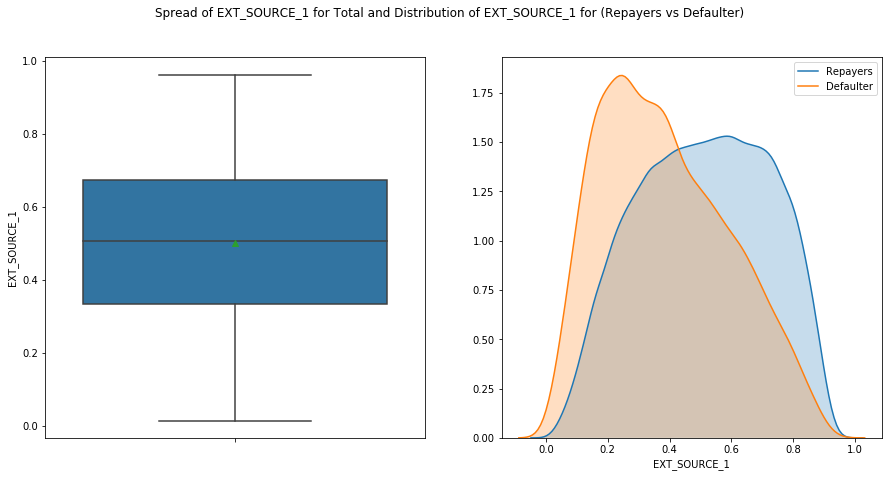

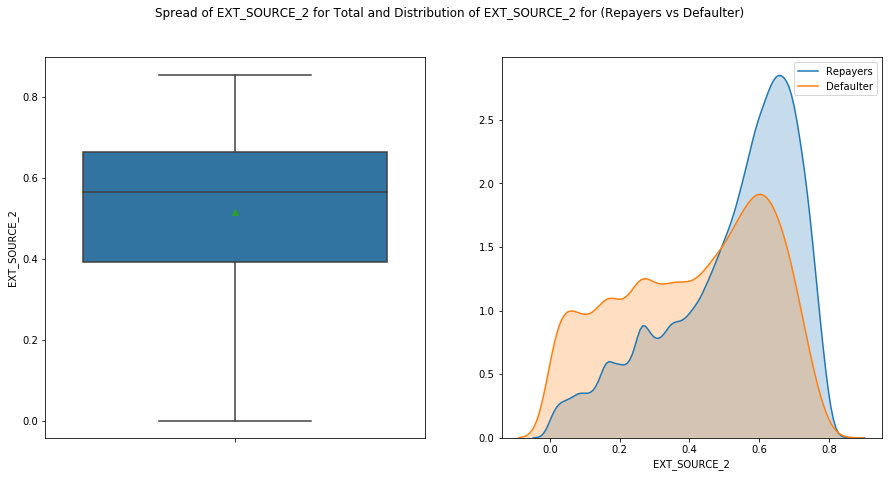

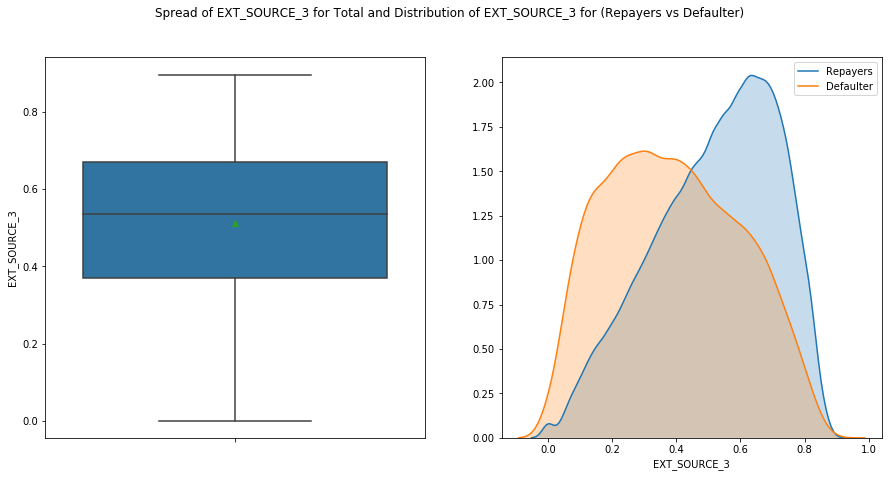

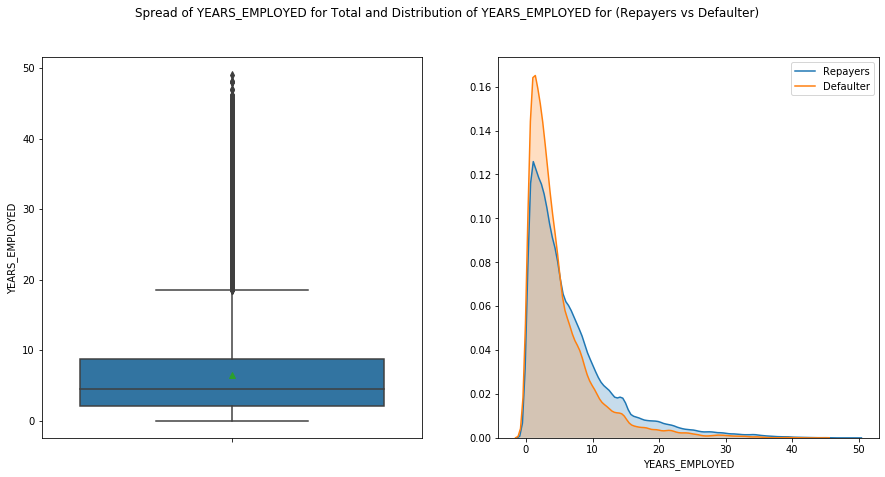

In [80]:
c = 1
for x in tem.columns.difference(uni_cont[1:4]):    #only choosing few columns
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,c)
    sns.boxplot(y = apply_data[x],showmeans = True) #boxplot for the whole data
    c += 1
    plt.subplot(1,2,c)
    for i in the_mix:  
        #looping on segmented dataframes
        #distplot for whole data with transparency
        
        sns.distplot(i[x].dropna(),hist = False,label = i['TARGET(YES/NO)'].value_counts().index[0],kde_kws = {'shade': True})
    plt.suptitle('Spread of ' + x + ' for Total and Distribution of '+ x +' for (Repayers vs Defaulter)')
    c = 1

### `Amount variables are immensly skewed with lot of outliers and Credit sources are normally distributed . The plotted distribution of Amt and years_employed variables after segmentation is not easy for comparision(when plotted without removing outliers) . More ever we are concerned with the general population (where most of the distribution lies) . Lets now plot only the inter quartile ranges to make out more clear interpretations `

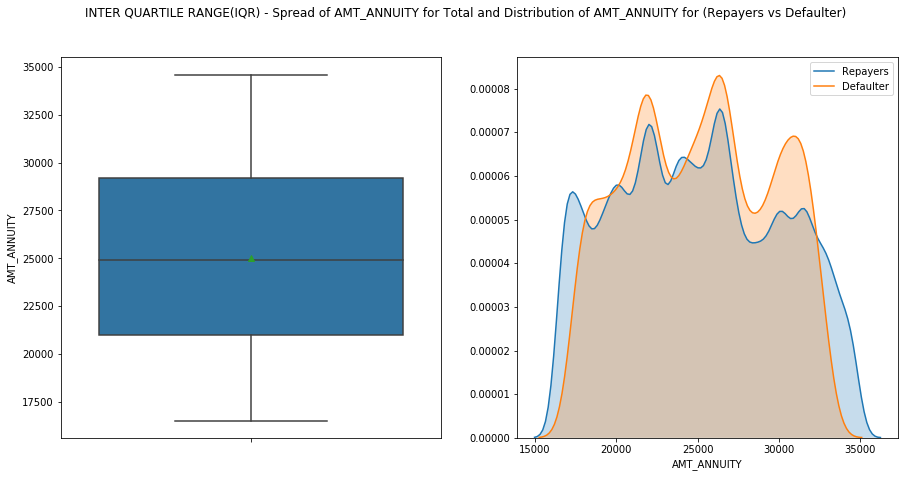

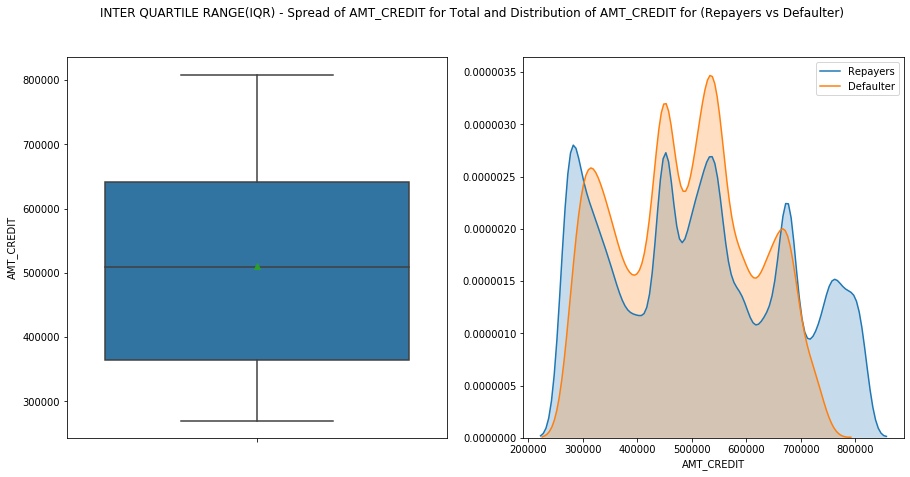

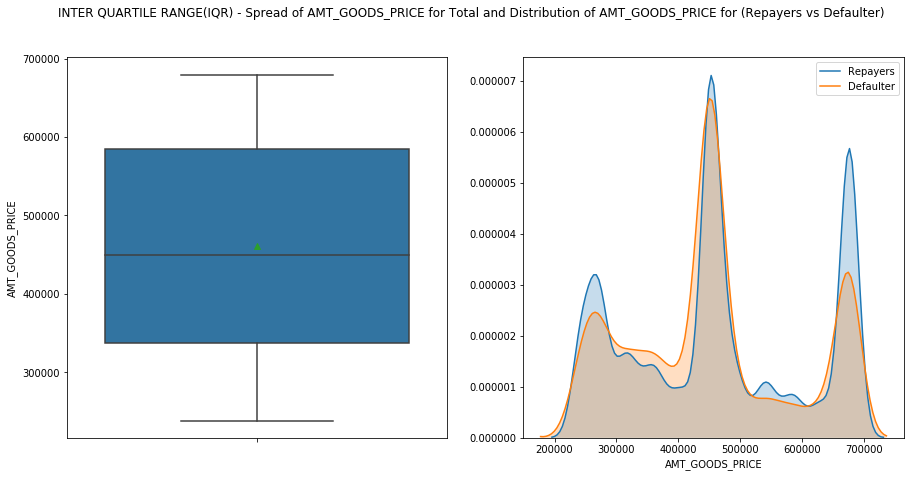

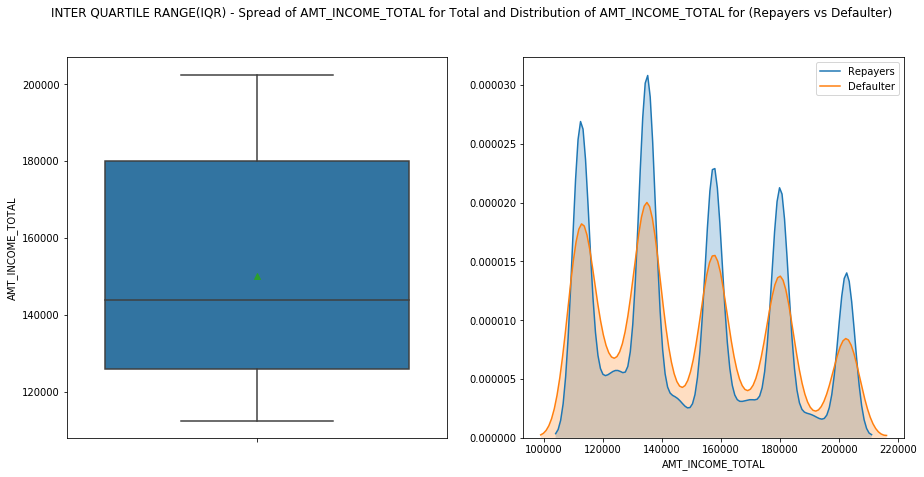

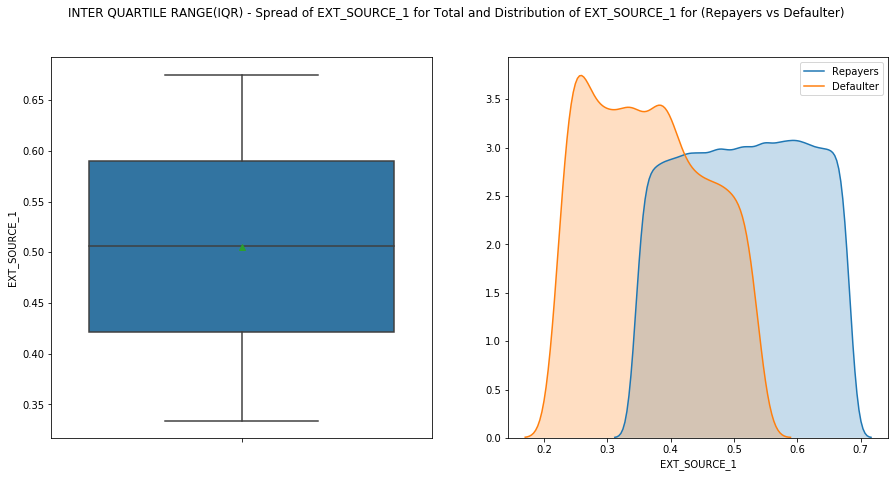

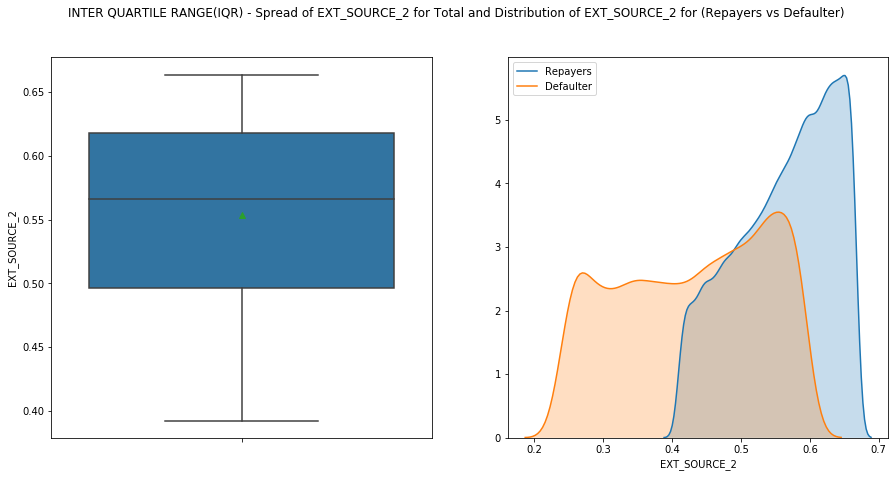

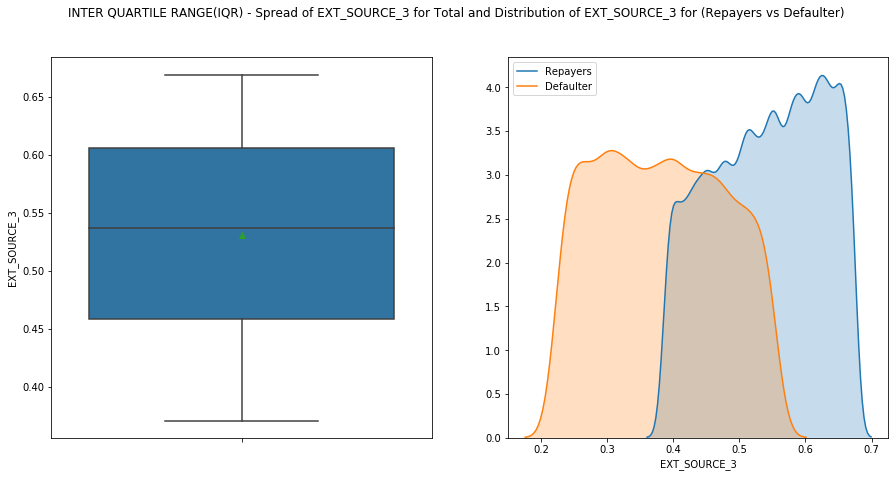

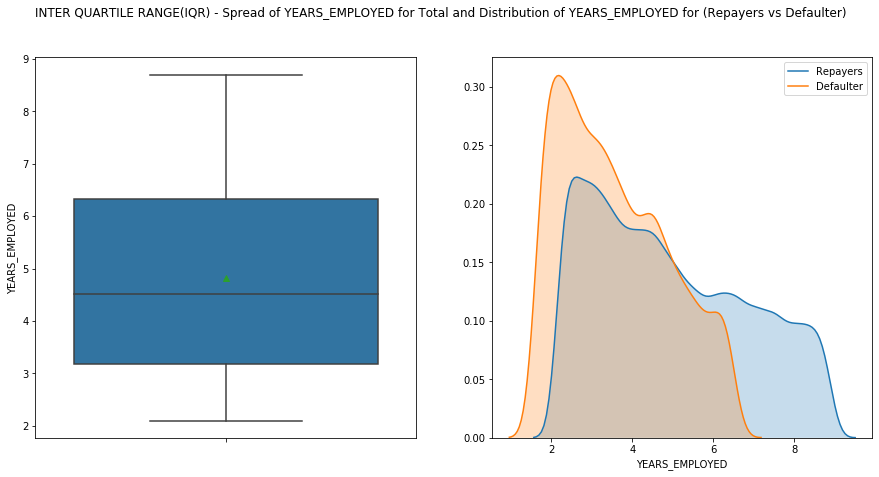

In [81]:
c = 1
for x in uni_cont:
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,c)
    iqr1 = apply_data[x][(apply_data[x] >= apply_data[x].quantile(0.25)) & (apply_data[x] <= apply_data[x].quantile(0.75)) ]
    sns.boxplot(y = iqr1,showmeans = True)
    c += 1
    plt.subplot(1,2,c)
    for i in the_mix:
        iqr2 = i[x][(i[x] >= i[x].quantile(0.25)) & (i[x] <= i[x].quantile(0.75)) ]
        sns.distplot(iqr2,hist = False,label = i['TARGET(YES/NO)'].value_counts().index[0],kde_kws = {'shade': True})
    plt.suptitle('INTER QUARTILE RANGE(IQR) - Spread of ' + x + ' for Total and Distribution of '+ x +' for (Repayers vs Defaulter)')
    c = 1




### OBSERVATION - `The 2nd plot shows the distribution of Credit amount for Repayers and Defaulters. Inter quartile range is where major population lies. The distribution of Defaulters is more than Repayers in IQR. The bank should focus to shift the distribution of defaulters towards left side ( left skewed) . In other words for defaulters credit amount must be reduced to avoid risk`

### ` 2) We can see that there are continuous spikes in the distribution of income which indicates there are some standard income packages followed across industries. `

### ` 3) For all 3 credit score sources repayers inter quartile range is spread in higher credit scores whereas defaulters inter quartile range is spread across lower credit scores. However among all 3 Ext source 1 seems more reliable because the distribution is perfectly normally distributed`

## Lets move on to BIVARIATE ANALYSIS

### Lets plot heatmaps of all numerical columns after segmentation based on 'TARGET' variable

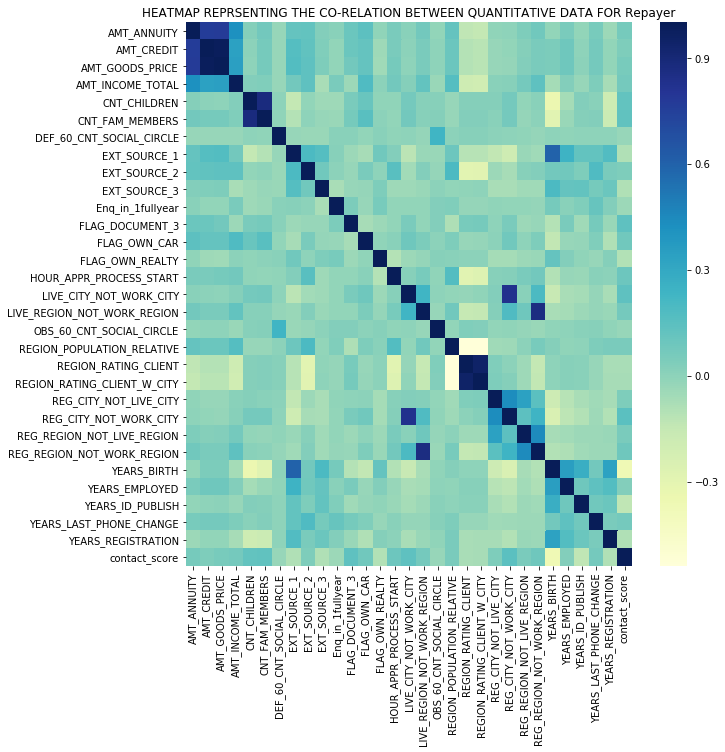

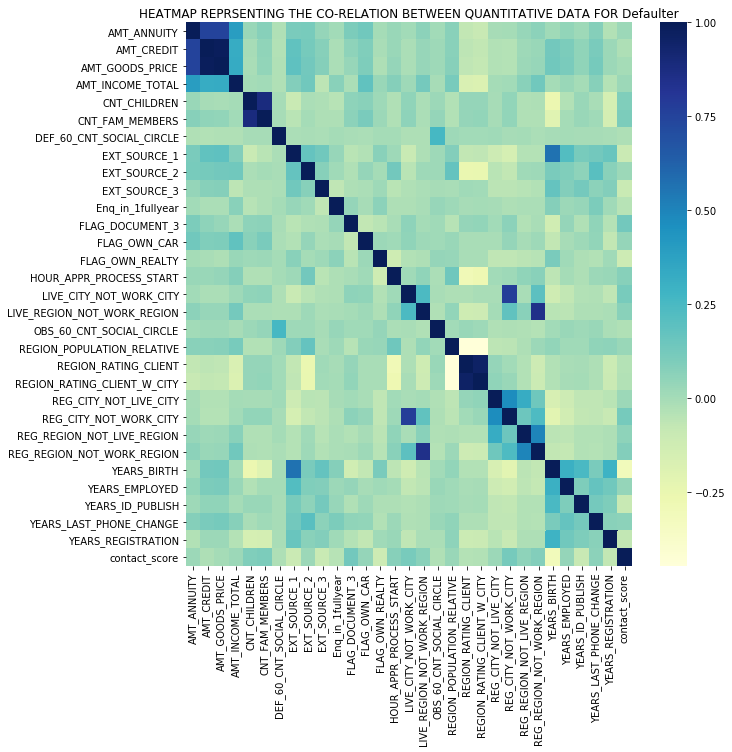

In [82]:
num_col = numeric_only.columns

lis = []
for x in the_mix:
    plt.figure(figsize = (10,10))
    sns.heatmap(x[num_col.difference(['TARGET'])].corr(),cmap="YlGnBu")
    plt.title('HEATMAP REPRSENTING THE CO-RELATION BETWEEN QUANTITATIVE DATA FOR ' + dic[x['TARGET'].unique()[0]])

### OBSERVATION- `Most of the patterns are matching . There is not much variation accross Defaulters and Repayers. But as there are many columns we need to observe patterns more closely (IN NUMERIC FORM)`

### Lets see which variables are highly co-related after segmentation for 'Defaulters' and 'Repayers'

#### Step 1) Creating a empty dictionary 
#### Step 2) Looping on the segmented dataframes
#### Step 3) Choosing all numerical columns and removing 'TARGET' variable , making a co-relation dataframe,unstacking it ,sorting in descending order , dropping duplicates
#### Step 4)  Choosing variables which have high positive co-relation and variables which have high negative co-relation
#### Step 5)  Saving the results and adding each result to the dictionary
#### Step 6) Showing the output

In [83]:
dict_corr = {}  #an empty dictionary to add 

for x in the_mix: #looping on 2 Segmented dataframes
    all_corr = x[num_col.difference(['TARGET'])].corr().unstack().sort_values(ascending = False).drop_duplicates()
    pos_5 = all_corr[1:6].to_frame()
    pos_5.columns = ['Top 5 Positive Co-relations for ' + str(dic[x['TARGET'].unique()[0]]) +' Data']
    neg_5 = all_corr[-5:].sort_values(ascending = True).to_frame()
    neg_5.columns = ['Top 5 Negative Co-relations for ' + str(dic[x['TARGET'].unique()[0]]) +' Data']
    
    dict_corr['Positive r for '+ str(dic[x['TARGET'].unique()[0]])] = pos_5
    dict_corr['Negative r for '+ str(dic[x['TARGET'].unique()[0]])] = neg_5
    
    
    

In [84]:
dict_corr['Positive r for Repayer']

Top 5 Positive Co-relations for Repayer Data
AMT_GOODS_PRICE             AMT_CREDIT                                                       0.987250
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT                                             0.950148
CNT_FAM_MEMBERS             CNT_CHILDREN                                                     0.878571
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION                                      0.861861
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY                                          0.830379

In [85]:
dict_corr['Positive r for Defaulter']

Top 5 Positive Co-relations for Defaulter Data
AMT_CREDIT                  AMT_GOODS_PRICE                                                    0.983103
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY                                        0.956637
CNT_FAM_MEMBERS             CNT_CHILDREN                                                       0.885481
LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION                                         0.847885
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY                                            0.778537

In [86]:
dict_corr['Negative r for Repayer']

Top 5 Negative Co-relations for Repayer Data
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE                                     -0.539008
REGION_RATING_CLIENT_W_CITY REGION_POPULATION_RELATIVE                                     -0.537305
YEARS_BIRTH                 contact_score                                                  -0.359181
CNT_CHILDREN                YEARS_BIRTH                                                    -0.336910
REGION_RATING_CLIENT        EXT_SOURCE_2                                                   -0.291619

In [87]:
dict_corr['Negative r for Defaulter']

Top 5 Negative Co-relations for Defaulter Data
REGION_RATING_CLIENT_W_CITY REGION_POPULATION_RELATIVE                                       -0.446990
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT                                             -0.443250
YEARS_BIRTH                 contact_score                                                    -0.307027
HOUR_APPR_PROCESS_START     REGION_RATING_CLIENT                                             -0.293903
REGION_RATING_CLIENT_W_CITY HOUR_APPR_PROCESS_START                                          -0.275698

### OBSERVATION - `ALL POSITIVE CO-RELATIONS ARE GENERAL AS WE KNOW THOSE VARIABLES ARE MEANT TO BE CO-RELATED. MUCH INTERESTING RELATION IS THE RELATION BETWEEN CONTACT SCORE AND YEARS BIRTH . SO , AS PEOPLE WITH HIGHER AGE PROVIDE LESS CONTACT INFORMATION`

###  We have seen the co-relations . Lets filter the continuous columns  to do Bivariate analysis

In [88]:
for_bi = tem.columns[:-1]  #using the continuous variables which we have used it recently 
        
for_bi       

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

### As the data is very huge , when we use a general scatterplot to plot segmented data represented with different colours it would be same like plotting the whole data.(The scope to see the patterns is limited). Similarly , if we use a best fit line to see the trend the magnitude of data points ,clusters ,etc, cannot be seen. Thus, lets choose a 'relplot' to check the trends and magnitude together.

<Figure size 432x288 with 0 Axes>

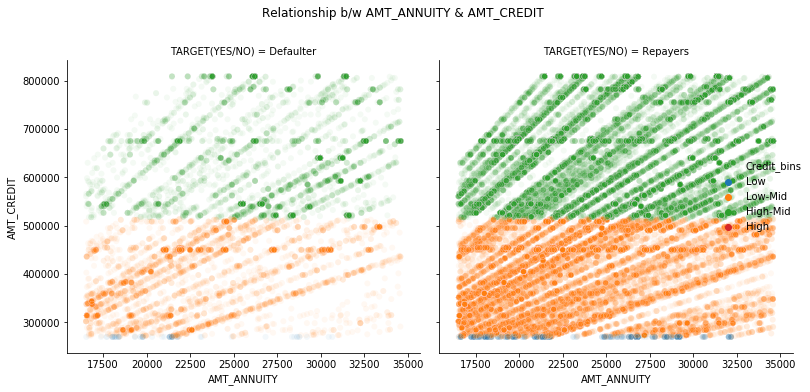

<Figure size 432x288 with 0 Axes>

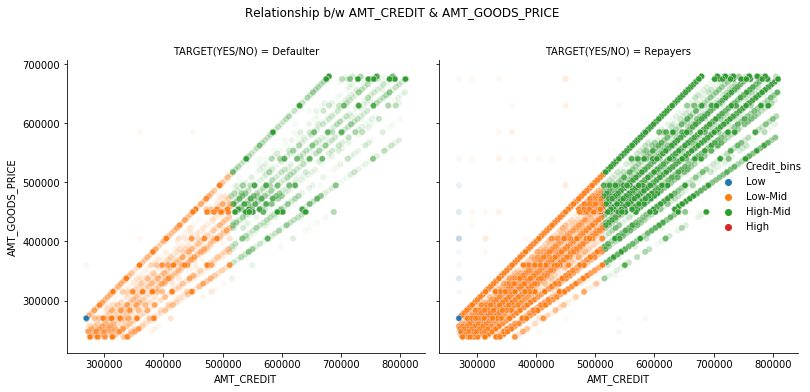

<Figure size 432x288 with 0 Axes>

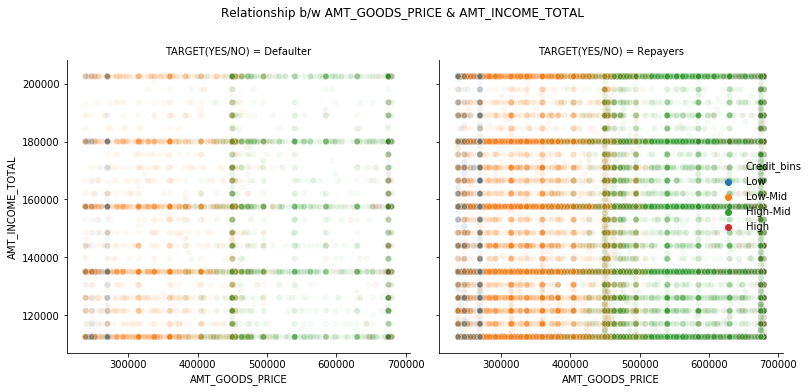

<Figure size 432x288 with 0 Axes>

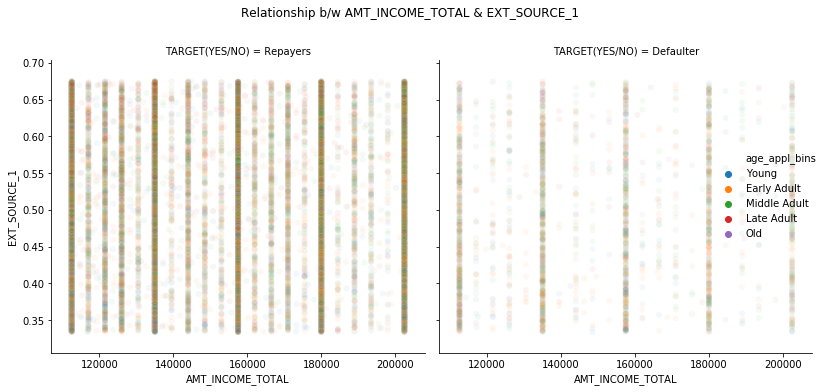

<Figure size 432x288 with 0 Axes>

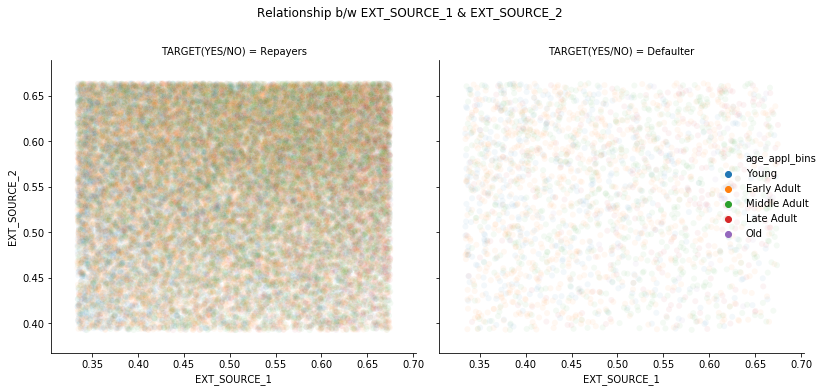

<Figure size 432x288 with 0 Axes>

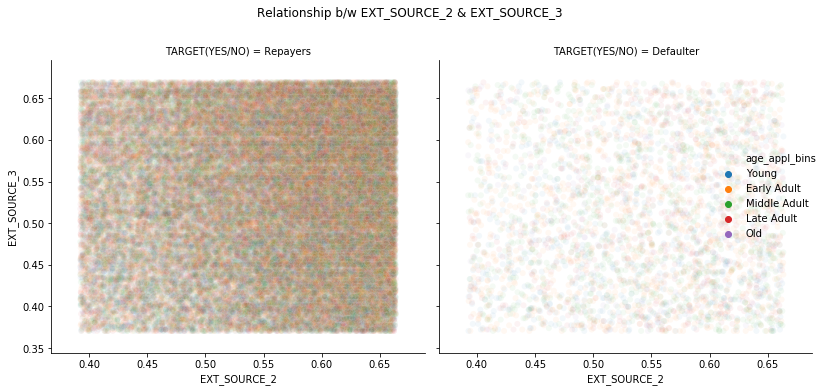

In [89]:
for x in range(len(for_bi)-1):
    plt.figure()
    iqr1= apply_data[(apply_data[for_bi[x]] >= apply_data[for_bi[x]].quantile(0.25)) & (apply_data[for_bi[x]] <= apply_data[for_bi[x]].quantile(0.75)) & (apply_data[for_bi[x+1]] >= apply_data[for_bi[x+1]].quantile(0.25)) & (apply_data[for_bi[x+1]] <= apply_data[for_bi[x+1]].quantile(0.75))]
    if x in [3,4,5]:
        third_var = 'age_appl_bins'
    else:
        third_var = 'Credit_bins'
    
    sns.relplot(x = for_bi[x] ,y = for_bi[x+1] ,data = iqr1, col = 'TARGET(YES/NO)',hue = third_var, marker='o', alpha=0.05)  
    plt.suptitle('Relationship b/w '+ for_bi[x] +  ' & ' + for_bi[x+1], y = 1.08)
    plt.tight_layout()
    
    

### OBSERVATION - `FOR BOTH REPAYER AND DEFAULTER CREDIT AMOUNT AND GOODS PRICE HAVE A GREAT POSITIVE RELATIONSHIP. HOWEVER WE CAN SEE SOMETHING INTERESTING. WHY ARE BANKS APPROVING HIGHER LOAN AMOUNT MORE THAN THAT OF THE GOODS PRICE EVEN FOR DEFAULTERS? TO AVOID RISK BANKS SHOULD ALWAYS MAINTAIN SLOPE OF THE SCATTER GREATER THAN 1`

### ` THE RELATIONSHIP BETWEEN EXT_SOURCE_2 AND EXT_SOURCE_3 seems very reliable source of judgement . The thickness on the top right block of the plot indicate that people with high scores from those 2 sources can be easily trusted upon. The bank should allot them loan`

## Lets deal with the previous application data 

In [90]:
pre_ap = prev_apply[:]  #hardcopy

In [91]:
pre_ap.head() 

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

#### In multiple columns we can see 'XNA' and 'XAP' which indicates that there are somethings to be addressed to avoid faulty interpretation.Lets come back to it after checking column names

In [92]:
pre_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

### We can see that there are lot of missing columns in this data also. Also we have same column names in the previous application data and main application train. So lets add 'PRE_' before each column so that when we merge data Discrepancy can be avoided

In [93]:
same_col = []

for x in apply_data.columns:
    if x in pre_ap.columns:
        same_col.append(x)
        
        
same_col    # same column names in both datasets

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START']

In [94]:
pre_ap.columns = 'PRE_' + pre_ap.columns  #adding pre before all columns
pre_ap.columns 

Index(['PRE_SK_ID_PREV', 'PRE_SK_ID_CURR', 'PRE_NAME_CONTRACT_TYPE',
       'PRE_AMT_ANNUITY', 'PRE_AMT_APPLICATION', 'PRE_AMT_CREDIT',
       'PRE_AMT_DOWN_PAYMENT', 'PRE_AMT_GOODS_PRICE',
       'PRE_WEEKDAY_APPR_PROCESS_START', 'PRE_HOUR_APPR_PROCESS_START',
       'PRE_FLAG_LAST_APPL_PER_CONTRACT', 'PRE_NFLAG_LAST_APPL_IN_DAY',
       'PRE_RATE_DOWN_PAYMENT', 'PRE_RATE_INTEREST_PRIMARY',
       'PRE_RATE_INTEREST_PRIVILEGED', 'PRE_NAME_CASH_LOAN_PURPOSE',
       'PRE_NAME_CONTRACT_STATUS', 'PRE_DAYS_DECISION',
       'PRE_NAME_PAYMENT_TYPE', 'PRE_CODE_REJECT_REASON',
       'PRE_NAME_TYPE_SUITE', 'PRE_NAME_CLIENT_TYPE',
       'PRE_NAME_GOODS_CATEGORY', 'PRE_NAME_PORTFOLIO',
       'PRE_NAME_PRODUCT_TYPE', 'PRE_CHANNEL_TYPE', 'PRE_SELLERPLACE_AREA',
       'PRE_NAME_SELLER_INDUSTRY', 'PRE_CNT_PAYMENT', 'PRE_NAME_YIELD_GROUP',
       'PRE_PRODUCT_COMBINATION', 'PRE_DAYS_FIRST_DRAWING',
       'PRE_DAYS_FIRST_DUE', 'PRE_DAYS_LAST_DUE_1ST_VERSION',
       'PRE_DAYS_LAST_DUE', 'PRE_DAY

#### When seeing the relation between the same columns in 'application train' and 'previous application data' we can filter columns if we have a list of it. Thus 'same_col2'  and 'same_col' can be used while making further filteration and analysis

In [95]:
same_col2 = []       

for x in same_col:
    y = 'PRE_' + x
    same_col2.append(y)

In [96]:
pre_ap['PRE_NAME_CASH_LOAN_PURPOSE'].unique()    #all unique values of 'PRE_NAME_CASH_LOAN_PURPOSE'

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [97]:
pre_ap = pre_ap.replace('XNA', np.nan)  #replacing XNA and XAP with 'null'
pre_ap = pre_ap.replace('XAP', np.nan)

### Checking the percentage of missing columns , so that we can choose the required data for merging accordingly

In [98]:
pre_miss = round(pre_ap.isnull().mean() * 100,2)
pre_miss

PRE_SK_ID_PREV                      0.00
PRE_SK_ID_CURR                      0.00
PRE_NAME_CONTRACT_TYPE              0.02
PRE_AMT_ANNUITY                    22.29
PRE_AMT_APPLICATION                 0.00
PRE_AMT_CREDIT                      0.00
PRE_AMT_DOWN_PAYMENT               53.64
PRE_AMT_GOODS_PRICE                23.08
PRE_WEEKDAY_APPR_PROCESS_START      0.00
PRE_HOUR_APPR_PROCESS_START         0.00
PRE_FLAG_LAST_APPL_PER_CONTRACT     0.00
PRE_NFLAG_LAST_APPL_IN_DAY          0.00
PRE_RATE_DOWN_PAYMENT              53.64
PRE_RATE_INTEREST_PRIMARY          99.64
PRE_RATE_INTEREST_PRIVILEGED       99.64
PRE_NAME_CASH_LOAN_PURPOSE         95.83
PRE_NAME_CONTRACT_STATUS            0.00
PRE_DAYS_DECISION                   0.00
PRE_NAME_PAYMENT_TYPE              37.56
PRE_CODE_REJECT_REASON             81.33
PRE_NAME_TYPE_SUITE                49.12
PRE_NAME_CLIENT_TYPE                0.12
PRE_NAME_GOODS_CATEGORY            56.93
PRE_NAME_PORTFOLIO                 22.29
PRE_NAME_PRODUCT

In [99]:
len(pre_ap['PRE_SK_ID_PREV'].unique())/len(pre_ap['PRE_SK_ID_PREV']) * 100

100.0

### 'PRE_SK_ID_PREV' has all columns unique . Lets set it up as index

In [100]:
pre_ap.index = pre_ap['PRE_SK_ID_PREV']

In [101]:
round(len(pre_ap['PRE_SK_ID_CURR'].unique())/len(pre_ap['PRE_SK_ID_CURR'])  * 100,2)

20.29

## The main column on which we needed to perform merge with main application train has  only 20% of unique values. This is because the previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer. A client may have applied loan multiple times . So we are now clear that the data contains multiple instances where a client has applied for a loan. 

## How shall we deal with it? Lets check the head so that we can get a sense of the data

In [102]:
pre_ap.head()

PRE_SK_ID_PREV  PRE_SK_ID_CURR PRE_NAME_CONTRACT_TYPE  \
PRE_SK_ID_PREV                                                          
2030495                2030495          271877         Consumer loans   
2802425                2802425          108129             Cash loans   
2523466                2523466          122040             Cash loans   
2819243                2819243          176158             Cash loans   
1784265                1784265          202054             Cash loans   

                PRE_AMT_ANNUITY  PRE_AMT_APPLICATION  PRE_AMT_CREDIT  \
PRE_SK_ID_PREV                                                         
2030495                1730.430              17145.0         17145.0   
2802425               25188.615             607500.0        679671.0   
2523466               15060.735             112500.0        136444.5   
2819243               47041.335             450000.0        470790.0   
1784265               31924.395             337500.0        404055.0   

                PRE_AMT_DOWN_PAYMENT  PRE_AMT_GOODS_PRICE  \
PRE_SK_ID_PREV                                              
2030495                          0.0              17145.0   
2802425                          NaN             607500.0   
2523466                          NaN             112500.0   
2819243                          NaN             450000.0   
1784265                          NaN             337500.0   

               PRE_WEEKDAY_APPR_PROCESS_START  PRE_HOUR_APPR_PROCESS_START  \
PRE_SK_ID_PREV                                                               
2030495                              SATURDAY                           15   
2802425                              THURSDAY                           11   
2523466                               TUESDAY                           11   
2819243                                MONDAY                            7   
1784265                              THURSDAY                            9   

               PRE_FLAG_LAST_APPL_PER_CONTRACT  PRE_NFLAG_LAST_APPL_IN_DAY  \
PRE_SK_ID_PREV                                                               
2030495                                      Y                           1   
2802425                                      Y                           1   
2523466                                      Y                           1   
2819243                                      Y                           1   
1784265                                      Y                           1   

                PRE_RATE_DOWN_PAYMENT  PRE_RATE_INTEREST_PRIMARY  \
PRE_SK_ID_PREV                                                     
2030495                           0.0                   0.182832   
2802425                           NaN                        NaN   
2523466                           NaN                        NaN   
2819243                           NaN                        NaN   
1784265                           NaN                        NaN   

                PRE_RATE_INTEREST_PRIVILEGED PRE_NAME_CASH_LOAN_PURPOSE  \
PRE_SK_ID_PREV                                                            
2030495                             0.867336                        NaN   
2802425                                  NaN                        NaN   
2523466                                  NaN                        NaN   
2819243                                  NaN                        NaN   
1784265                                  NaN                    Repairs   

               PRE_NAME_CONTRACT_STATUS  PRE_DAYS_DECISION  \
PRE_SK_ID_PREV                                               
2030495                        Approved                -73   
2802425                        Approved               -164   
2523466                        Approved               -301   
2819243                        Approved               -512   
1784265                         Refused               -781   

                PRE_NAME_PAYMENT_TYPE P

## `We are mostly concerned with the Continuous data of the previous application train and one other most important categorical column we are concerned of is what decision did bank take on the previous application? i.e Did it reject loan? Did it approve it?  Is the bank approving loans to 'expected defaulters' ?

#### Lets first only consider columns which are of datatype float or int

In [103]:
del pre_ap['PRE_SK_ID_PREV']
allnum = pre_ap.loc[:,(pre_ap.dtypes == np.int) | (pre_ap.dtypes == np.float)].columns


## One very efficient way to extract all the information without loosing data while merging is using the measures of central tendancy (i.e mean,median or mode). For ex: if a customer has applied for loan three times and claimed 10 rs , 20 rs , 30 rs each time respectively we can group it with respect to his current sk_id and extract its mean , median or mode . But the question remains when to choose what?

### 1) When you want to group continuous data (ratio scale) we can use mean
### 2) As ordinal(ordered categorical) data cannot be represented with float median can be choosen
### 3) When you want to group categorical data mode can be choosen

In [104]:
k = pre_ap.groupby('PRE_SK_ID_CURR')[allnum].mean()   #grouping continous columns with respect to 'SK_ID'              and mean for the columns

### Now , we have unique column for each client

In [105]:
k.head()

PRE_SK_ID_CURR  PRE_AMT_ANNUITY  PRE_AMT_APPLICATION  \
PRE_SK_ID_CURR                                                         
100001                100001.0         3951.000             24835.50   
100002                100002.0         9251.775            179055.00   
100003                100003.0        56553.990            435436.50   
100004                100004.0         5357.250             24282.00   
100005                100005.0         4813.200             22308.75   

                PRE_AMT_CREDIT  PRE_AMT_DOWN_PAYMENT  PRE_AMT_GOODS_PRICE  \
PRE_SK_ID_CURR                                                              
100001                23787.00                2520.0              24835.5   
100002               179055.00                   0.0             179055.0   
100003               484191.00                3442.5             435436.5   
100004                20106.00                4860.0              24282.0   
100005                20076.75                4464.0              44617.5   

                PRE_HOUR_APPR_PROCESS_START  PRE_NFLAG_LAST_APPL_IN_DAY  \
PRE_SK_ID_CURR                                                            
100001                            13.000000                         1.0   
100002                             9.000000                         1.0   
100003                            14.666667                         1.0   
100004                             5.000000                         1.0   
100005                            10.500000                         1.0   

                PRE_RATE_DOWN_PAYMENT  PRE_RATE_INTEREST_PRIMARY  \
PRE_SK_ID_CURR                                                     
100001                       0.104326                        NaN   
100002                       0.000000                        NaN   
100003                       0.050030                        NaN   
100004                       0.212008                        NaN   
100005                       0.108964                        NaN   

                PRE_RATE_INTEREST_PRIVILEGED  PRE_DAYS_DECISION  \
PRE_SK_ID_CURR                                                    
100001                                   NaN            -1740.0   
100002                                   NaN             -606.0   
100003                                   NaN            -1305.0   
100004                                   NaN             -815.0   
100005                                   NaN             -536.0   

                PRE_SELLERPLACE_AREA  PRE_CNT_PAYMENT  PRE_DAYS_FIRST_DRAWING  \
PRE_SK_ID_CURR                                                                  
100001                          23.0              8.0                365243.0   
100002                         500.0             24.0                365243.0   
100003                         533.0             10.0                365243.0   
100004                          30.0              4.0                365243.0   
100005                          18.0             12.0                365243.0   

                PRE_DAYS_FIRST_DUE  PRE_DAYS_LAST_DUE_1ST_VERSION  \
PRE_SK_ID_CURR                                                      
100001                -1709.000000                   -1499.000000   
100002                 -565.000000                     125.000000   
100003                -1274.333333                   -1004.333333   
100004                 -784.000000                    -694.000000   
100005                 -706.000000                    -376.000000   

                PRE_DAYS_LAST_DUE  PRE_DAYS_TERMINATION  \
PRE_SK_ID_CURR                                            
100001               -1619.000000          -1612.000000   
100002                 -25.000000            -17.000000   
100003               -1054.333333          -1047.333333   
100004                -724.000000           -714.000000   
100005                -466.000000           -460.000000   

                PRE_NFLAG_INSURE

## As mentioned we need to one very useful info about approval rates of each client

In [106]:
pre_ap['PRE_NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### There are 4 possibilities on the decision of the application. 
### WE NEED:
#### 1) How many times loan has been approved?
#### 2) How many times loan has been rejected?
#### 3) What is the approval rate?
#### 4) Was there any delay in the application process which made the client Cancel it?

### Accordingly lets create 3 columns which represent it 

In [107]:
pre_ap['Approve_Times'] = pre_ap['PRE_NAME_CONTRACT_STATUS'].map({'Approved':1,'Refused':np.nan,'Canceled':np.nan,'Unused offer':np.nan})
pre_ap['Rejected'] = pre_ap['PRE_NAME_CONTRACT_STATUS'].map({'Approved':np.nan,'Refused':1,'Canceled':np.nan,'Unused offer':np.nan})

pre_ap['Applied_Times'] = 1

### If we groupby Sk_ID for those columns and sum it up we will get the required information

In [108]:
g = pre_ap.groupby('PRE_SK_ID_CURR')[['Approve_Times','Rejected','Applied_Times']].sum()
g.head()

Approve_Times  Rejected  Applied_Times
PRE_SK_ID_CURR                                        
100001                    1.0       0.0              1
100002                    1.0       0.0              1
100003                    3.0       0.0              3
100004                    1.0       0.0              1
100005                    1.0       0.0              2

#### Lets once check all the common columns useful for our analysis

In [109]:
same_col2 

['PRE_AMT_ANNUITY',
 'PRE_AMT_CREDIT',
 'PRE_AMT_GOODS_PRICE',
 'PRE_HOUR_APPR_PROCESS_START',
 'PRE_NAME_CONTRACT_TYPE',
 'PRE_NAME_TYPE_SUITE',
 'PRE_WEEKDAY_APPR_PROCESS_START']

### `We have grouped by mean on the amount columns. But other coloumns are categorical. We need to groupby mode for those if we want to use it for comparision with main application train data. AS THE DATA IS VERY HUGE THE COMPUTATION IS VERY TEDIOUS . As we have enough continuous variables and information about approval lets choose on to work on those for now.`

### The code to groupby based on mode( IF REQUIRED TO DEVELOP FURTHER ANALYSIS AND MODELS)

def mode(x):<br>
>if x.isnull().all() :<br>
        >return(np.nan)<br>
>else:<br>
        return(x.value_counts().index[0])<br>
    
lis = [] <br>
for x in same_col2[3:]: <br>
   Mode_val = pre_ap.groupby('PRE_SK_ID_CURR')[x].apply(mode) <br>
   lis.append(Mode_val)
   
    

### Lets choose the columns of the grouped data useful for our analysis 

In [110]:
col_need = []
for x in k.columns:
    if (x.split('_')[1] == 'AMT') |( x == 'PRE_DAYS_DECISION' )| (x == 'PRE_RATE_DOWN_PAYMENT'):
        col_need.append(x)

In [111]:
col_need

['PRE_AMT_ANNUITY',
 'PRE_AMT_APPLICATION',
 'PRE_AMT_CREDIT',
 'PRE_AMT_DOWN_PAYMENT',
 'PRE_AMT_GOODS_PRICE',
 'PRE_RATE_DOWN_PAYMENT',
 'PRE_DAYS_DECISION']

In [112]:
k = k[col_need]
k.columns = 'AVG_' + k.columns     #Lets add 'avg_' for all continous variables

### lets also merge data regarding 'approval' to it

In [113]:
prev_final = k.merge(g,left_on = k.index,right_on = g.index,how = 'inner')
prev_final = prev_final.rename(columns = {'key_0':'SK_ID_CURR'})
prev_final = prev_final.set_index('SK_ID_CURR')
prev_final.head()

AVG_PRE_AMT_ANNUITY  AVG_PRE_AMT_APPLICATION  AVG_PRE_AMT_CREDIT  \
SK_ID_CURR                                                                     
100001                 3951.000                 24835.50            23787.00   
100002                 9251.775                179055.00           179055.00   
100003                56553.990                435436.50           484191.00   
100004                 5357.250                 24282.00            20106.00   
100005                 4813.200                 22308.75            20076.75   

            AVG_PRE_AMT_DOWN_PAYMENT  AVG_PRE_AMT_GOODS_PRICE  \
SK_ID_CURR                                                      
100001                        2520.0                  24835.5   
100002                           0.0                 179055.0   
100003                        3442.5                 435436.5   
100004                        4860.0                  24282.0   
100005                        4464.0                  44617.5   

            AVG_PRE_RATE_DOWN_PAYMENT  AVG_PRE_DAYS_DECISION  Approve_Times  \
SK_ID_CURR                                                                    
100001                       0.104326                -1740.0            1.0   
100002                       0.000000                 -606.0            1.0   
100003                       0.050030                -1305.0            3.0   
100004                       0.212008                 -815.0            1.0   
100005                       0.108964                 -536.0            1.0   

            Rejected  Applied_Times  
SK_ID_CURR                           
100001           0.0              1  
100002           0.0              1  
100003           0.0              3  
100004           0.0              1  
100005           0.0              2

## Finally lets merge all the extracted data from the previous application to the main application train. (merge with key as respective dataframe indices)

In [114]:
Big_merge = apply_data.merge(prev_final,how = 'left',right_on = prev_final.index,left_on = apply_data.index)
Big_merge = Big_merge.rename(columns = {'key_0':'SK_ID_CURR'})
Big_merge = Big_merge.set_index('SK_ID_CURR')
Big_merge.head()

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
SK_ID_CURR                                                               
100002          24700.5    406597.5         351000.0          202500.0   
100003          35698.5   1293502.5        1129500.0          270000.0   
100004           6750.0    135000.0         135000.0           67500.0   
100006          29686.5    312682.5         297000.0          135000.0   
100007          21865.5    513000.0         513000.0          121500.0   

            CNT_CHILDREN  CNT_FAM_MEMBERS CODE_GENDER  \
SK_ID_CURR                                              
100002                 0              1.0           M   
100003                 0              2.0           F   
100004                 0              1.0           M   
100006                 0              2.0           F   
100007                 0              1.0           M   

            DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_1  EXT_SOURCE_2  \
SK_ID_CURR                                                         
100002                           2.0      0.083037      0.262949   
100003                           0.0      0.311267      0.622246   
100004                           0.0           NaN      0.555912   
100006                           0.0           NaN      0.650442   
100007                           0.0           NaN      0.322738   

            EXT_SOURCE_3  Enq_in_1fullyear  FLAG_DOCUMENT_3  FLAG_OWN_CAR  \
SK_ID_CURR                                                                  
100002          0.139376               1.0                1             0   
100003               NaN               0.0                1             0   
100004          0.729567               0.0                0             1   
100006               NaN               NaN                1             0   
100007               NaN               0.0                0             0   

            FLAG_OWN_REALTY  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                                      
100002                    1                       10                        0   
100003                    0                       11                        0   
100004                    1                        9                        0   
100006                    1                       17                        0   
100007                    1                       11                        1   

            LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE  \
SK_ID_CURR                                                   
100002                                0         Cash loans   
100003                                0         Cash loans   
100004                                0    Revolving loans   
100006                                0         Cash loans   
100007                                0         Cash loans   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
100002      Secondary / secondary special  Single / not married   
100003                   Higher education               Married   
100004      Secondary / secondary special  Single / not married   
100006      Secondary / secondary special        Civil marriage   
100007      Secondary / secondary special  Single / not married   

            NAME_HOUSING_TYPE NAME_INCOME_TYPE NAME_TYPE_SUITE  \
SK_ID_CURR                                                       
100002      House / apartment          Working   Unaccompanied   
100003      House / apartment    State servant          Family   
100004      House / apartment          Working   Unaccompanied   
100006      House / apartment          Working   Unaccompanied   
100007      House / apartment          Working   Unaccompanied   

            OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  \
SK_ID_CURR                                                  

### Let's derive some more columns.

1) 'Claim_count' - No of times a client has claimed for the loan <br>
2) 'Not_claimed'(UNUSED OFFER / CANCELLED) =  Total times applied - [ approved  + rejected] <br>
3) 'Approval_Rate' - % of times loan was approved

In [115]:
Big_merge['Claim_count'] =  Big_merge['Rejected'] + Big_merge['Approve_Times']
Big_merge['Not_claimed'] = Big_merge['Applied_Times'] - Big_merge['Claim_count']
Big_merge['Approval_Rate'] = round((100* Big_merge['Approve_Times'])/Big_merge['Claim_count'],2)
Big_merge.head()

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
SK_ID_CURR                                                               
100002          24700.5    406597.5         351000.0          202500.0   
100003          35698.5   1293502.5        1129500.0          270000.0   
100004           6750.0    135000.0         135000.0           67500.0   
100006          29686.5    312682.5         297000.0          135000.0   
100007          21865.5    513000.0         513000.0          121500.0   

            CNT_CHILDREN  CNT_FAM_MEMBERS CODE_GENDER  \
SK_ID_CURR                                              
100002                 0              1.0           M   
100003                 0              2.0           F   
100004                 0              1.0           M   
100006                 0              2.0           F   
100007                 0              1.0           M   

            DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_1  EXT_SOURCE_2  \
SK_ID_CURR                                                         
100002                           2.0      0.083037      0.262949   
100003                           0.0      0.311267      0.622246   
100004                           0.0           NaN      0.555912   
100006                           0.0           NaN      0.650442   
100007                           0.0           NaN      0.322738   

            EXT_SOURCE_3  Enq_in_1fullyear  FLAG_DOCUMENT_3  FLAG_OWN_CAR  \
SK_ID_CURR                                                                  
100002          0.139376               1.0                1             0   
100003               NaN               0.0                1             0   
100004          0.729567               0.0                0             1   
100006               NaN               NaN                1             0   
100007               NaN               0.0                0             0   

            FLAG_OWN_REALTY  HOUR_APPR_PROCESS_START  LIVE_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                                      
100002                    1                       10                        0   
100003                    0                       11                        0   
100004                    1                        9                        0   
100006                    1                       17                        0   
100007                    1                       11                        1   

            LIVE_REGION_NOT_WORK_REGION NAME_CONTRACT_TYPE  \
SK_ID_CURR                                                   
100002                                0         Cash loans   
100003                                0         Cash loans   
100004                                0    Revolving loans   
100006                                0         Cash loans   
100007                                0         Cash loans   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
100002      Secondary / secondary special  Single / not married   
100003                   Higher education               Married   
100004      Secondary / secondary special  Single / not married   
100006      Secondary / secondary special        Civil marriage   
100007      Secondary / secondary special  Single / not married   

            NAME_HOUSING_TYPE NAME_INCOME_TYPE NAME_TYPE_SUITE  \
SK_ID_CURR                                                       
100002      House / apartment          Working   Unaccompanied   
100003      House / apartment    State servant          Family   
100004      House / apartment          Working   Unaccompanied   
100006      House / apartment          Working   Unaccompanied   
100007      House / apartment          Working   Unaccompanied   

            OBS_60_CNT_SOCIAL_CIRCLE OCCUPATION_TYPE       ORGANIZATION_TYPE  \
SK_ID_CURR                                                  

### List of all columns we have extracted from previous data

In [116]:
all_col_prev = list(prev_final.columns) + ['Claim_count','Not_claimed','Approval_Rate']
all_col_prev

['AVG_PRE_AMT_ANNUITY',
 'AVG_PRE_AMT_APPLICATION',
 'AVG_PRE_AMT_CREDIT',
 'AVG_PRE_AMT_DOWN_PAYMENT',
 'AVG_PRE_AMT_GOODS_PRICE',
 'AVG_PRE_RATE_DOWN_PAYMENT',
 'AVG_PRE_DAYS_DECISION',
 'Approve_Times',
 'Rejected',
 'Applied_Times',
 'Claim_count',
 'Not_claimed',
 'Approval_Rate']

## UNIVARIATE ANALYSIS ( PREVIOUS APPLICATION)

In [117]:
# seeing no of unique values to choose best method to plot it

Cat_uni = Big_merge.columns[-6:-1]
Big_merge[Cat_uni].nunique()     

Approve_Times    26
Rejected         46
Applied_Times    65
Claim_count      55
Not_claimed      38
dtype: int64

### Lets check the spread of ordered categorical data using a Boxplot

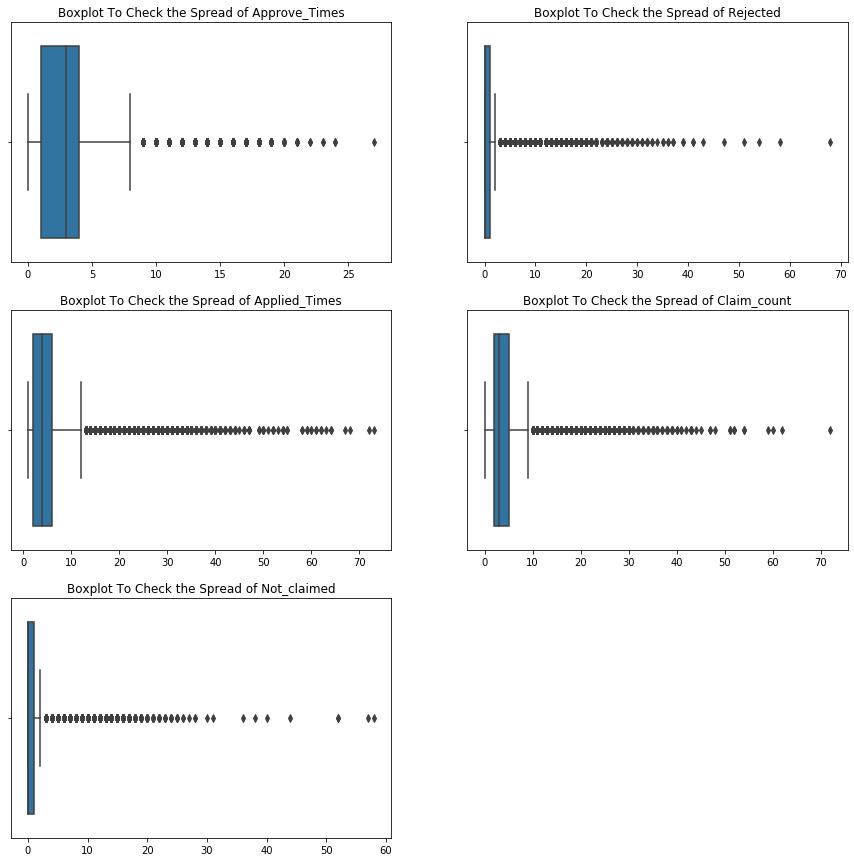

In [118]:
c = 1
plt.figure(figsize = (15,15))
for x in Cat_uni:
    plt.subplot(3,2,c)
    sns.boxplot(Big_merge[x].dropna())
    plt.title('Boxplot To Check the Spread of ' + x)
    plt.xlabel('')
    c +=1

### There are lots and lots of outliers. Lets plot the proporation of contribution of each sub sector segmented for 'Defaulters' and 'Repayers' respectively  - AFTER REMOVING OUTLIERS

<Figure size 864x2016 with 0 Axes>

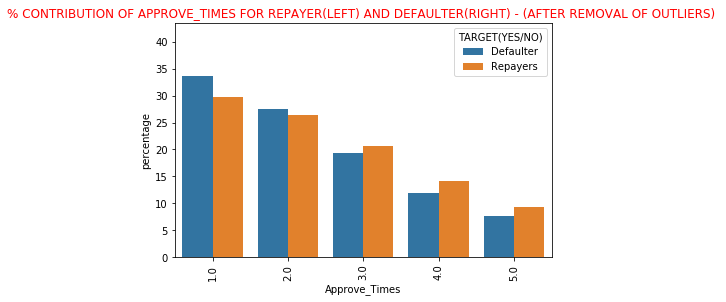

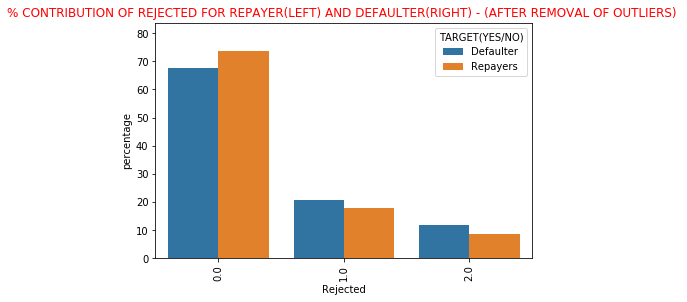

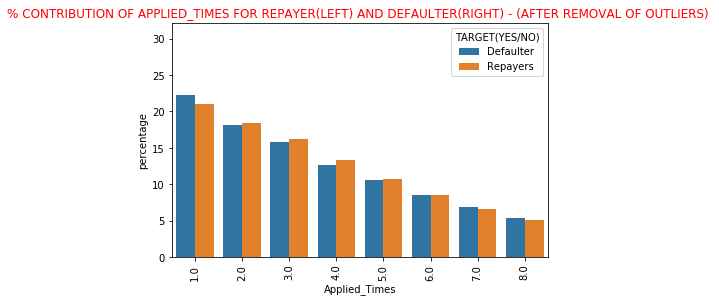

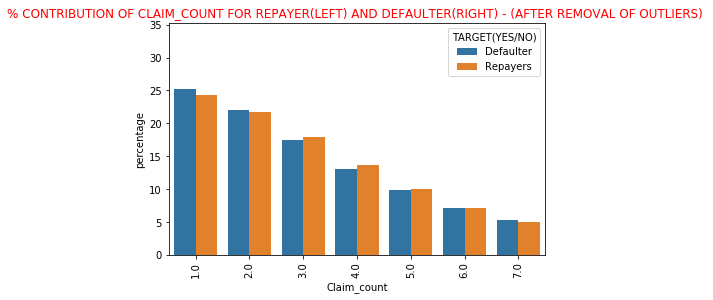

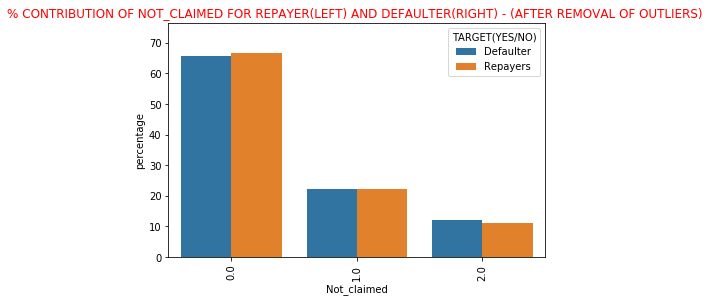

In [119]:
c = 1

plt.figure(figsize = (12,28))
for x in Cat_uni:
        plt.figure()
        iqr = Big_merge[(Big_merge[x] >= Big_merge[x].quantile(0.15)) & (Big_merge[x] <= Big_merge[x].quantile(0.85))]
        group = iqr.groupby(['TARGET(YES/NO)'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = group ,hue = 'TARGET(YES/NO)')
        plt.ylim(0,group['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90)
        c += 1
        
        plt.title('% CONTRIBUTION OF '+ x.upper() + ' FOR REPAYER(LEFT) AND DEFAULTER(RIGHT) - (AFTER REMOVAL OF OUTLIERS) ',color = 'r')

###  OBSERVATION - ` The distribution looks promising for both Defaulters and Repayers in these categories . But the bank should reduce the percentage of approval for defaulters for the first and second time. Atleast their loan approval duration must take longer time . Lets see it`  

# Univariate continuous

### Filtering all continuous columns

In [120]:
Big_merge[prev_final.columns.difference(Big_merge[Cat_uni].columns)].nunique()

AVG_PRE_AMT_ANNUITY          269687
AVG_PRE_AMT_APPLICATION      191770
AVG_PRE_AMT_CREDIT           210632
AVG_PRE_AMT_DOWN_PAYMENT      54136
AVG_PRE_AMT_GOODS_PRICE      185847
AVG_PRE_DAYS_DECISION         60029
AVG_PRE_RATE_DOWN_PAYMENT    166569
dtype: int64

#### Days_decision column is in relative with the current application date. Lets convert it to positive

In [121]:
Big_merge['AVG_PRE_DAYS_DECISION'].head()

SK_ID_CURR
100002    -606.000000
100003   -1305.000000
100004    -815.000000
100006    -272.444444
100007   -1222.833333
Name: AVG_PRE_DAYS_DECISION, dtype: float64

In [122]:
Big_merge['AVG_PRE_DAYS_DECISION'] = abs(Big_merge['AVG_PRE_DAYS_DECISION'])

### Lets check the spread of AMT columns belonging to the previous_application so that we can plot segmented data accordingly

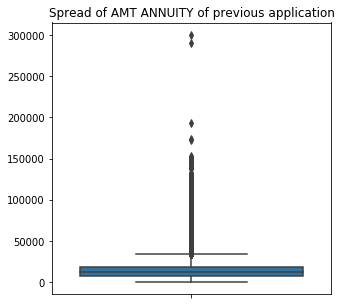

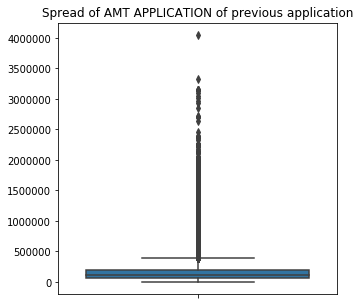

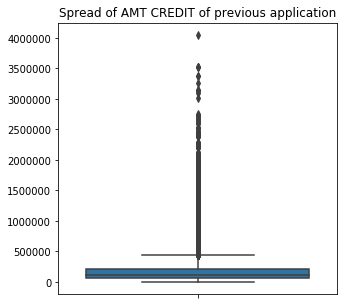

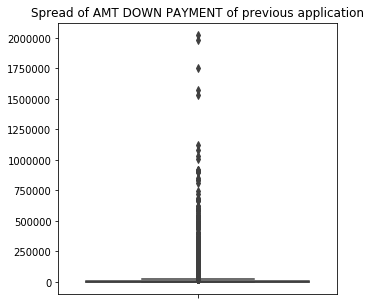

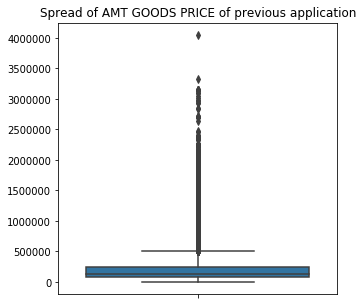

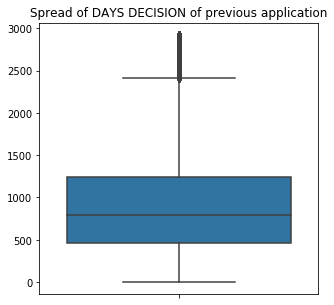

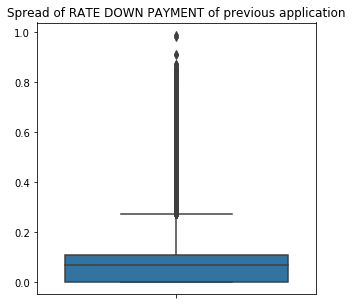

In [123]:
Cont_col = Big_merge[prev_final.columns.difference(Big_merge[Cat_uni].columns)].columns

for x in Cont_col:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = Big_merge[x].dropna())
    name = ' '.join(x.split('_')[2:])
    plt.ylabel('')
    plt.title('Spread of '+ name + ' of previous application' )
    

### The 'AMT' columns are extremly skewed. If we were to segment it and compare it we need to remove outliers . Lets choose to plot only the distributions of the inter quartile range as we are concerned with the trend with most of the general population

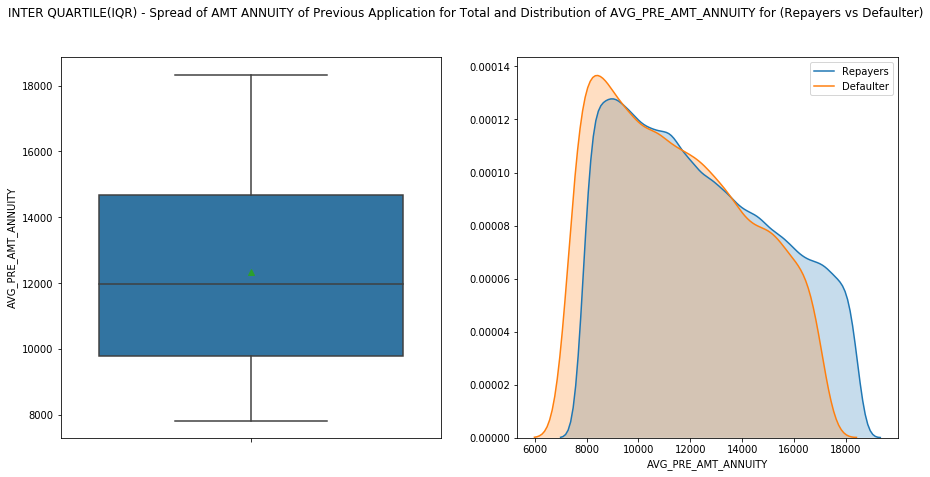

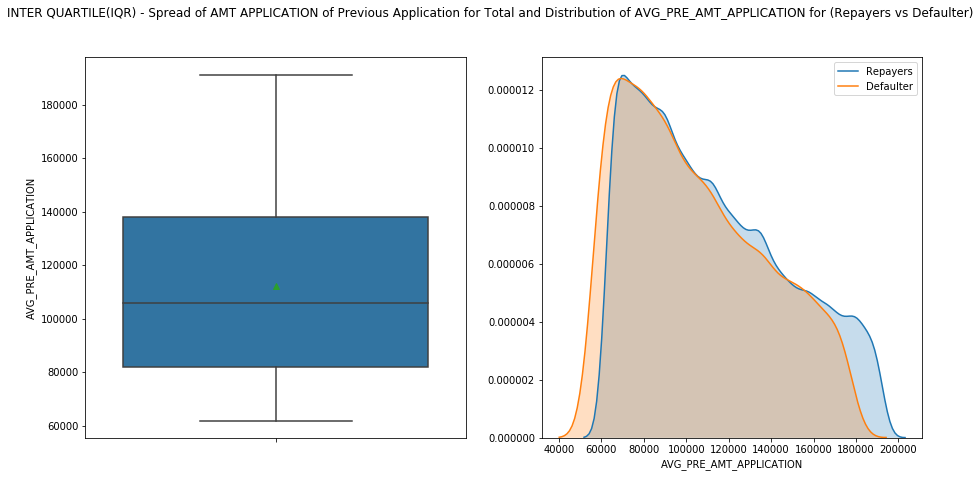

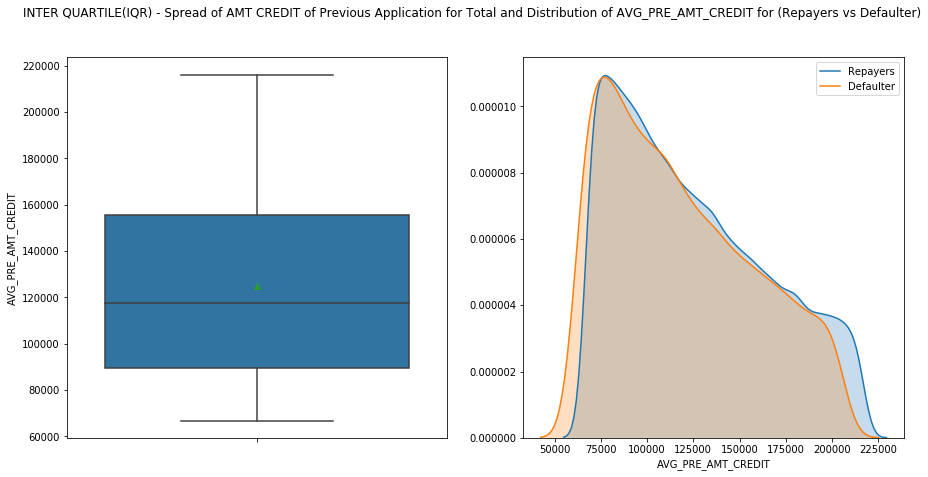

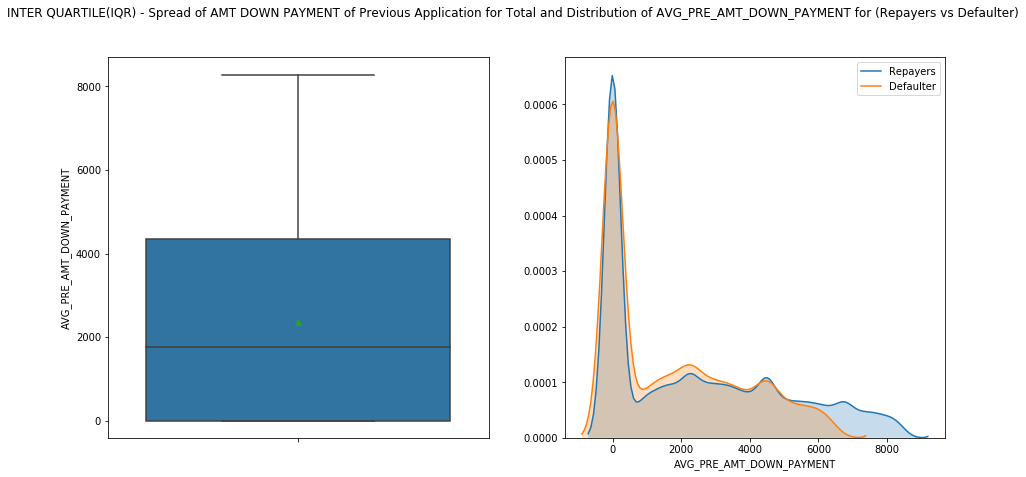

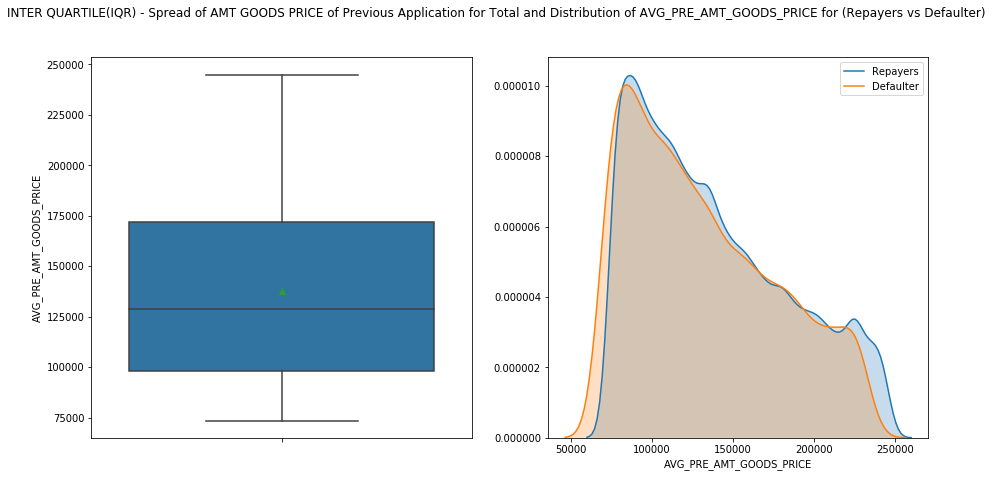

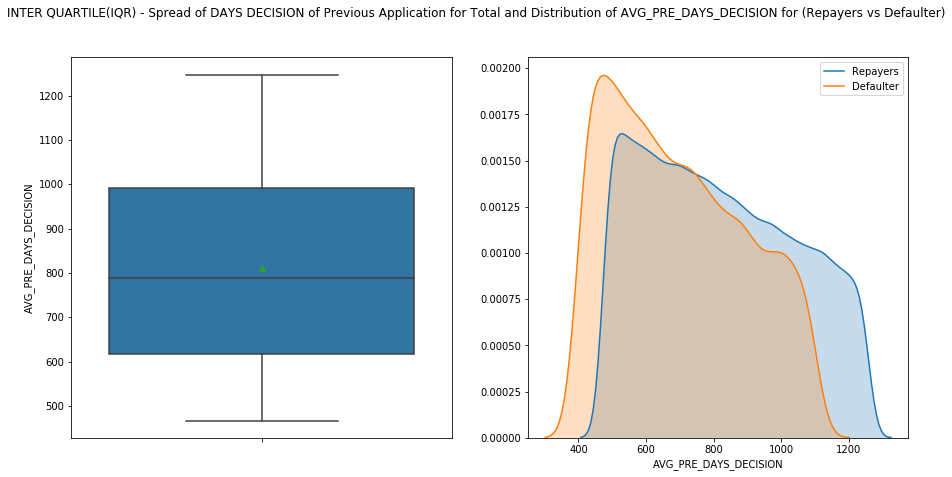

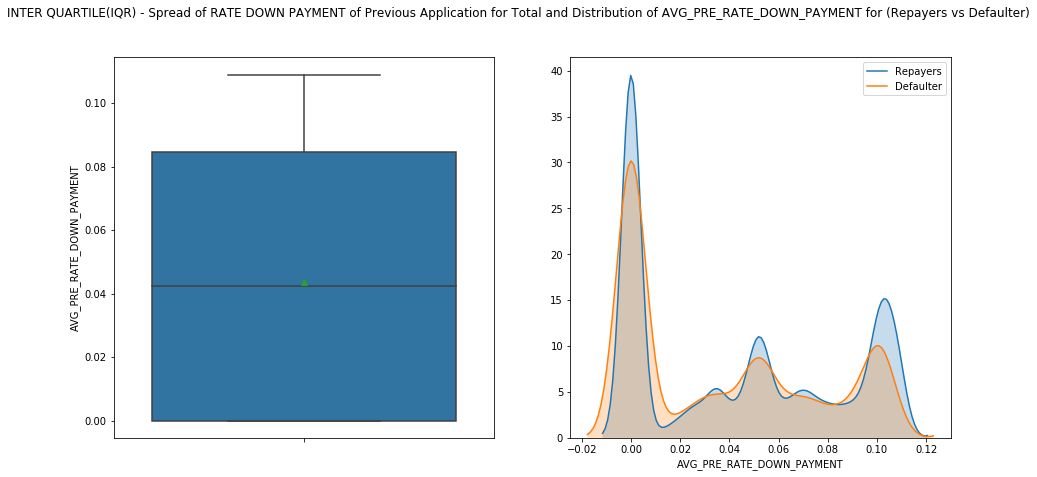

In [124]:
tar_one = Big_merge[Big_merge['TARGET'] == 1]     #segmenting data based on 'TARGET'
tar_zero = Big_merge[Big_merge['TARGET'] == 0]

two_mix = [tar_zero,tar_one] #making a list of the two dataframes for looping on it

c = 1
for x in Cont_col:
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,c)
    #filtering the data with only inter quartile range
    iqr1 = Big_merge[x][(Big_merge[x] >= Big_merge[x].quantile(0.25)) & (Big_merge[x] <= Big_merge[x].quantile(0.75)) ]
    sns.boxplot(y = iqr1,showmeans = True)
    c += 1
    plt.subplot(1,2,c)
    for i in two_mix: #looping on the two segmented dataframes
        #having their own inter-quartile ranges
        iqr2 = i[x][(i[x] >= i[x].quantile(0.25)) & (i[x] <= i[x].quantile(0.75)) ]
        sns.distplot(iqr2,hist = False,label = i['TARGET(YES/NO)'].value_counts().index[0],kde_kws = {'shade': True})
    plt.suptitle('INTER QUARTILE(IQR) - Spread of ' + ' '.join(x.split('_')[2:]) + ' of Previous Application for Total and Distribution of '+ x +' for (Repayers vs Defaulter)')
    c = 1




### OBSERVATION - ` 1) AVG_PRE_DAYS_DECISION  typically indicates how fast or slow a person takes to apply for the next loan. In this context we can see that Defaulters tend to apply loan sooner after a previous loan has already been taken. The bank should note risk in such type of customers who approve loan at a faster rate`

### `2) REPAYERS HAVE BEEN CHARGED WITH HIGHER RATE OF DOWN PAYMENT . THE BANK SHOULD FOCUS ON GIVING LOAN ON A LESSER RATE OF DOWN PAYMENT AS LESS RISK IS INVOLVED`

### We have plotted inter quartile range but we also want to know is bank making mistake by not approving loan to who are expected to repay it ? Or is it approving loan to someone at a high rate who is expected to be a defaulter?

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


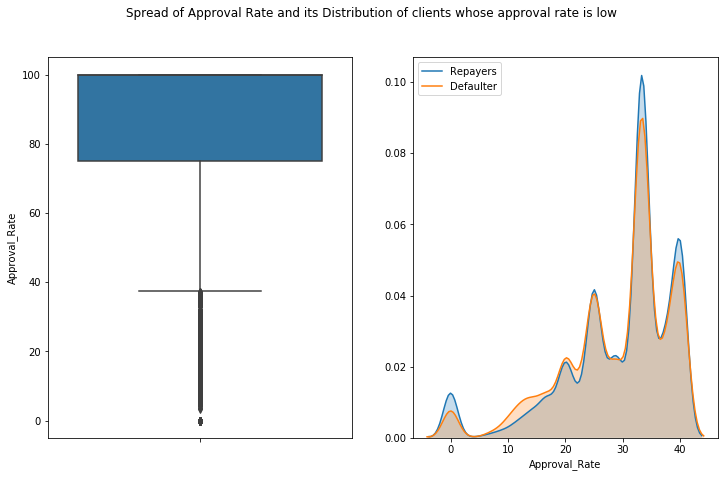

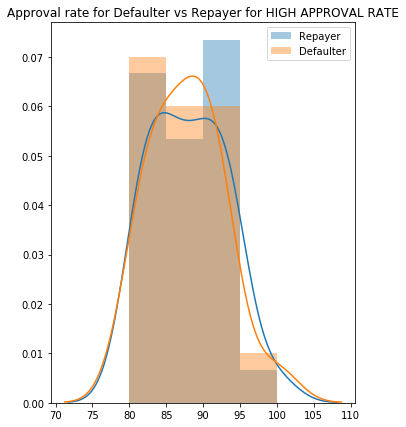

In [125]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.boxplot(y = Big_merge['Approval_Rate'])
plt.subplot(1,2,2)
for i in two_mix:
    below_40 = i['Approval_Rate'][(i['Approval_Rate'] <= 40) ]
    sns.distplot(below_40,hist = False,label = i['TARGET(YES/NO)'].value_counts().index[0],kde_kws = {'shade': True})
    plt.suptitle('Spread of Approval Rate and its Distribution of clients whose approval rate is low')
plt.figure(figsize = (12,7))

c = 1
for i in two_mix:
    above_80 = i['Approval_Rate'][(i['Approval_Rate'] >= 80) ]
    above_80 = above_80.value_counts(normalize = True ) * 100
    plt.subplot(1,2,c)
    sns.distplot(above_80.index,label = i['TARGET(YES/NO)'].value_counts().index[0])
    plt.title('Approval rate for Defaulter vs Repayer for HIGH APPROVAL RATE' )
    plt.legend(['Repayer','Defaulter'])
    
    

### `Expected Repayers are having a lower approval rate and at the same time surprisingly the distribution of Defaulters are higher than Repayers for high approval rate. BANK SHOULD VERY MUCH FOCUS ON REDUCING THE APPROVAL RATES FOR DEFAULTERS AS HIGH RISK IS INVOLVED`

# BIVARIATE ANALYSIS 

### Lets first see if there is any significant co-relation between columns extracted from previous application train and the Target variable

In [126]:
full_corr = Big_merge.loc[:,(Big_merge.dtypes == np.float) | (Big_merge.dtypes == np.int) ].corr()

tar_corr = full_corr.loc['TARGET',all_col_prev].to_frame()
tar_corr = abs(tar_corr).sort_values('TARGET',ascending = False)
tar_corr


TARGET
Approval_Rate              0.080392
Rejected                   0.064477
AVG_PRE_DAYS_DECISION      0.046868
AVG_PRE_AMT_ANNUITY        0.034860
AVG_PRE_RATE_DOWN_PAYMENT  0.033597
Approve_Times              0.031549
AVG_PRE_AMT_DOWN_PAYMENT   0.024621
AVG_PRE_AMT_APPLICATION    0.021795
Applied_Times              0.019767
Not_claimed                0.018748
AVG_PRE_AMT_CREDIT         0.016106
AVG_PRE_AMT_GOODS_PRICE    0.015838
Claim_count                0.015804

### Lets plot top 10 co-relations of the columns from the previous application data with the data  from the current application train

In [127]:
dict_corr = {}        

import warnings
warnings.filterwarnings("ignore")

for x in two_mix:
    simple = abs(x.corr())[all_col_prev]   #****** considering top 10 this time irrespective of the direction of change ****
    simple = simple.loc[simple.index.difference(all_col_prev),:]
    simple = simple.unstack().reset_index().sort_values(0,ascending = False).rename(columns = {'level_0':'1st variable','level_1':'2nd variable'}).rename(columns = {'level_0':'1st variable','level_1':'2nd variable'})
    top_10 = simple[:11]
    top_10['CO-RELATION'] = top_10['1st variable'] + ' and ' + top_10['2nd variable']
    del top_10['1st variable']
    del top_10['2nd variable']
    top_10 = top_10.set_index('CO-RELATION')
    top_10.columns = ['Top 10 Co-relations for ' + str(dic[x['TARGET'].unique()[0]]) +' Data(WITH PREVIOUS APP DATA)']
    dict_corr['r for '+ str(dic[x['TARGET'].unique()[0]])] = top_10
    

In [128]:
dict_corr['r for Repayer']

Top 10 Co-relations for Repayer Data(WITH PREVIOUS APP DATA)
CO-RELATION                                                                                                    
Applied_Times and Enq_in_1fullyear                                                          0.553443           
Not_claimed and Enq_in_1fullyear                                                            0.513840           
Claim_count and Enq_in_1fullyear                                                            0.447961           
Approve_Times and Enq_in_1fullyear                                                          0.417606           
AVG_PRE_DAYS_DECISION and YEARS_LAST_PHONE_CHANGE                                           0.337568           
AVG_PRE_AMT_ANNUITY and AMT_INCOME_TOTAL                                                    0.308243           
AVG_PRE_AMT_ANNUITY and AMT_ANNUITY                                                         0.290091           
Rejected and Enq_in_1fullyear                                                               0.289994           
AVG_PRE_AMT_GOODS_PRICE and Enq_in_1fullyear                                                0.282397           
AVG_PRE_AMT_GOODS_PRICE and AMT_INCOME_TOTAL                                                0.257872           
AVG_PRE_AMT_APPLICATION and AMT_INCOME_TOTAL                                                0.245126

In [129]:
dict_corr['r for Defaulter']

Top 10 Co-relations for Defaulter Data(WITH PREVIOUS APP DATA)
CO-RELATION                                                                                                      
Applied_Times and Enq_in_1fullyear                                                          0.540146             
Not_claimed and Enq_in_1fullyear                                                            0.502669             
Claim_count and Enq_in_1fullyear                                                            0.439452             
Approve_Times and Enq_in_1fullyear                                                          0.402230             
AVG_PRE_AMT_ANNUITY and AMT_INCOME_TOTAL                                                    0.314716             
Rejected and Enq_in_1fullyear                                                               0.309692             
AVG_PRE_DAYS_DECISION and YEARS_LAST_PHONE_CHANGE                                           0.303036             
AVG_PRE_AMT_GOODS_PRICE and Enq_in_1fullyear                                                0.297294             
AVG_PRE_AMT_GOODS_PRICE and AMT_INCOME_TOTAL                                                0.258038             
AVG_PRE_AMT_ANNUITY and Enq_in_1fullyear                                                    0.247496             
AVG_PRE_AMT_APPLICATION and AMT_INCOME_TOTAL                                                0.242259

### WOW! MANY OF THEM ARE CO RELATED WITH ENQUIRIES TO CREDIT BUREAU IN 1 FULL YEAR.(ENQ_IN_1fullyear ). This is very much interesting pattern. But all those coloumns of 'APPROVAL' data is co-related with ENQUIRIES because those columns are already highly co-related with each other

Text(0.5, 0.98, '% distribution ENQUIRIES TO CREDIT BUREAU IN 1 FULL YEAR ')

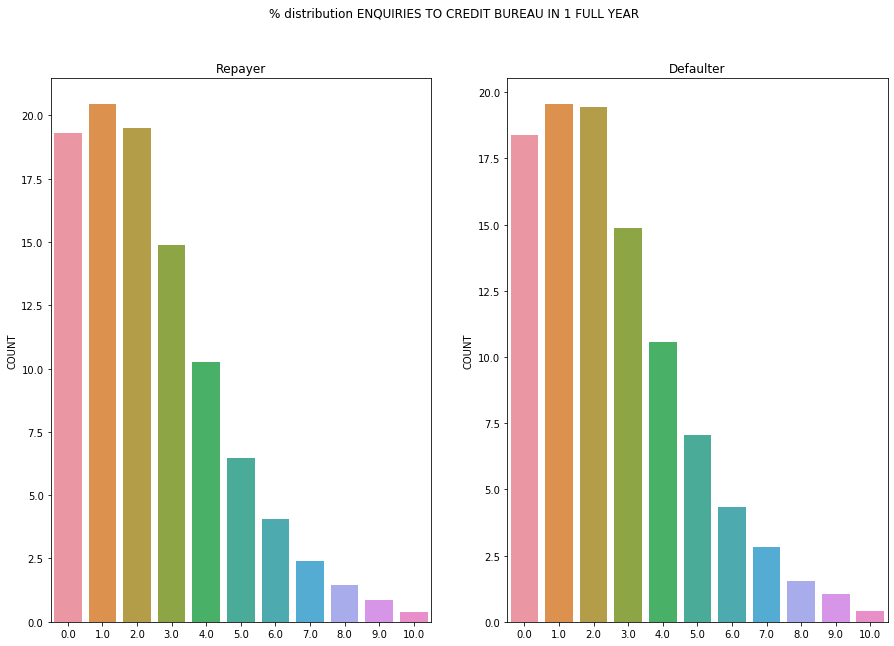

In [130]:
plt.figure(figsize = (15,10))
c = 1
for x in two_mix:
    plt.subplot(1,2,c)
    z = x['Enq_in_1fullyear'][x['Enq_in_1fullyear'] <= 10].value_counts(normalize = True).mul(100).sort_index()
    sns.barplot(x = z.index,y = z)
    plt.ylabel('COUNT')
    plt.title(dic[x['TARGET'].value_counts().index[0]])
    c +=1

plt.suptitle('% distribution ENQUIRIES TO CREDIT BUREAU IN 1 FULL YEAR ')

### `Lets choose some important continuous variables to perform bivariate analysis. INCOME AND ANNUITY of the main application train are co-related with previous application data. Lets make a list of those and loop on it to plot accordingly`

In [131]:
for_bi1 = ['AMT_INCOME_TOTAL','AMT_ANNUITY']
for_bi2 = ['AVG_PRE_AMT_ANNUITY', 'AVG_PRE_AMT_CREDIT', 'AVG_PRE_AMT_GOODS_PRICE','AVG_PRE_AMT_APPLICATION']

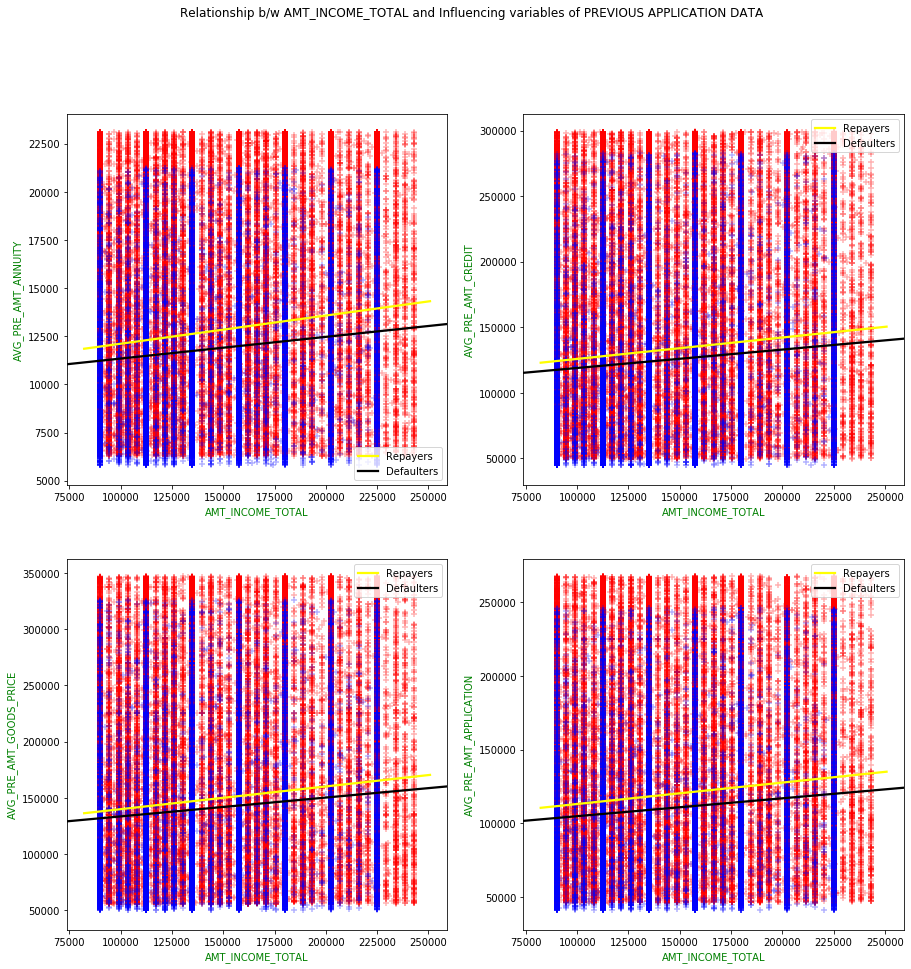

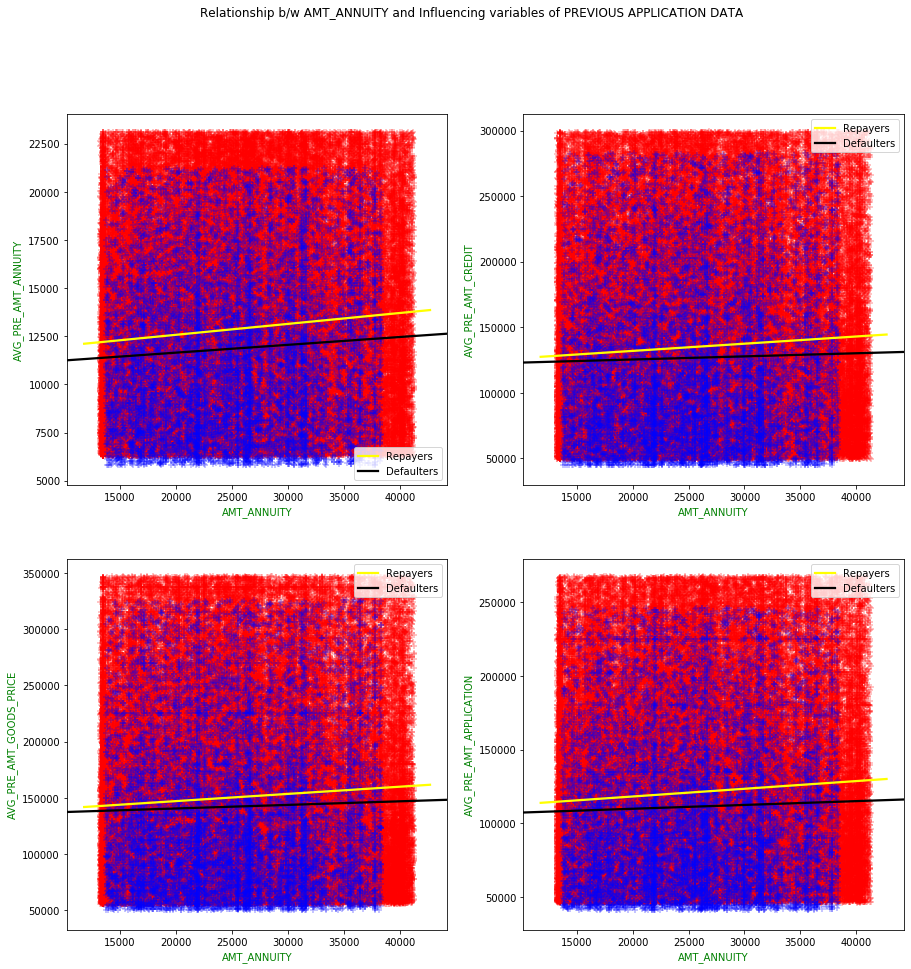

In [132]:
point_dic = {0:'red',1:'blue'}    #using as a key to change colours of datapoints for each segment (target) respectively
line_dic = {0:'yellow',1:'black'} #using as a key to change colour of BEST FIT LINE for each segment (target) respectively



for x in for_bi1: #looping on columns of application train
    plt.figure(figsize = (15,15))
    c = 1
    for y in for_bi2:
        plt.subplot(2,2,c)
        g = 0
        for z in two_mix: # looping on segmented dataframes
            
            # removing any unrealistic datapoints by removing 1% of the datapoints from each tail respectively
            clean = z[(z[x] >= z[x].quantile(0.15)) & (z[x] <= z[x].quantile(0.85)) & (z[y] >= z[y].quantile(0.15)) & (z[y] <= z[y].quantile(0.85))]
            sns.regplot(clean[x],clean[y],marker = '+',scatter_kws={"color": point_dic[g],'alpha':0.3}, line_kws={"color": line_dic[g]},ci = None )
            plt.ylabel(y,color = 'Green')
            plt.xlabel(x ,color = 'Green')
            g += 1
        plt.suptitle('Relationship b/w ' + x + ' and Influencing variables of PREVIOUS APPLICATION DATA')
        plt.legend(['Repayers','Defaulters'])
        c += 1 

### `The trend line for both Re payers and Defaulters follow a similar pattern in almost  all the plots`

### `It is important to note the fact that for Re payers the slope is  steeper than that of Defaulters`
 
### `This pattern will be very helpful in prediction of loan default when plotted for another small sample`


### Other explorations

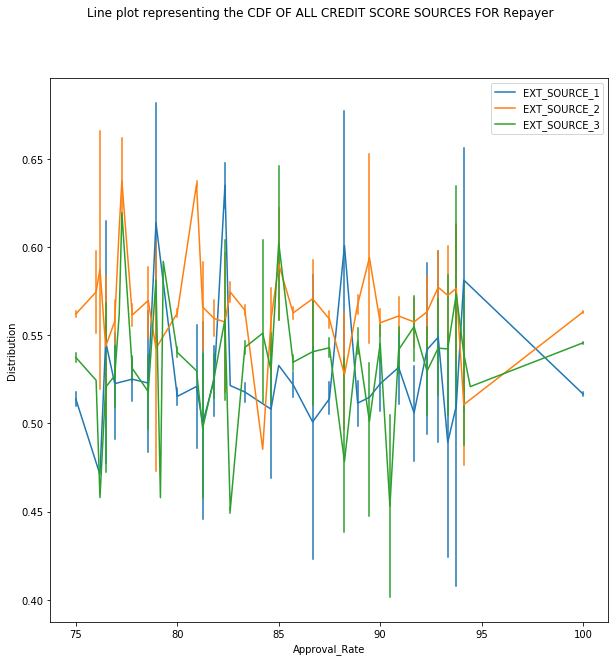

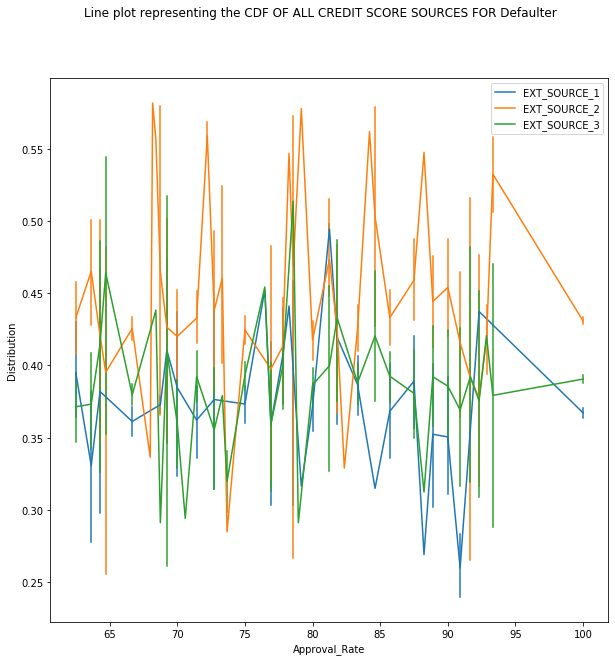

In [133]:


c = 1

for g in two_mix:
    plt.figure(figsize = (10,10))
    for  x in ['Approval_Rate']:
        for i in  ['EXT_SOURCE_1', 'EXT_SOURCE_2' ,'EXT_SOURCE_3']:
            k = g[x][(g[x] >= g[x].quantile(0.25)) & (g[x] <= g[x].quantile(0.75))]
            f = g[i][(g[i] >= g[i].quantile(0.25)) & (g[i] <= g[i].quantile(0.75))]
            sns.lineplot(k,f,label = i,err_style='bars')
            plt.ylabel('Distribution')
    plt.suptitle('Line plot representing the CDF OF ALL CREDIT SCORE SOURCES FOR '+dic[g['TARGET'].value_counts().index[0]])
    


# RESULTS AND FINAL CONCLUSIONS

`1)We can hypothesize that greater proportion of people who claim loan start their careers late`

`2) Occupations ranging from Security staff to private service staff are occupations which are risk prone. Bank should take care while approving loan to them`

`3) FEMALES ARE RELATIVELY RISK FREE THAN MEN`

`4) GREATER PROPORTION OF DEFAULTERS ARE MARRIED (MAY BE MIDDLE AGED)`

`5) SURPRSINGLY PRISONERS TEND TO REPAY LOAN MORE OFTEN`

`6) ALL LABOUR GROUPS ARE OCCUPATIONS WHERE HIGH RISK CAN BE SEEN`

`7) WE HAVE ALREADY HYPOTHESISED THAT PEOPLE WHO APPLY FOR LOAN TEND TO GET INTO EMPLOYMENT VERY LATE. SO YOUNG PEOPLE ARE MOSTLY UNEMPLOYED OR RECENT JOB HOLDERS. IT IS ALWAYS RISK APPROVING THEIR LOAN¶`


`8) for defaulters credit amount must be reduced to avoid risk`

`9) We can see that there are continuous spikes in the distribution of income which indicates there are some standard income packages followed across industries.`

`10) PEOPLE WITH HIGHER AGE PROVIDE LESS CONTACT INFORMATION`

`11) Expected Repayers are having a lower approval rate and at the same time surprisingly the distribution of Defaulters are higher than Repayers for high approval rate. BANK SHOULD VERY MUCH FOCUS ON REDUCING THE APPROVAL RATES FOR DEFAULTERS AS HIGH RISK IS INVOLVED`
